# Introduction


##<h2>Title</h2>
Car Price Prediction.

selamat datang di project saya, saya Irvan Sikajudin, seorang Data Science enthusiast, project ini berisikan beberapa proses, mulai dari Data Understanding, EDA, Deep dive EDA, Data Prepocessing, Split Data to Train data and Test Data kemudian melatih beberapa model yang dianggap cocok dgn data yang ada.

##<h2>Context and Source</h2>

# <h2>Context</h2>
<html>
<div class="col-lg-10 p-4 mb-5 mobile overviewHackathonCntr"><div><h5>About Data</h5><p class="overview">With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.</p><h5>Dataset Description</h5><ul><li>Train.csv - 19237 rows x 18 columns (Includes Price Columns as Target)</li><li>Attributes</li><ul><li>ID</li><li>Price: price of the care(Target Column)</li><li>Levy</li><li>Manufacturer</li><li>Model</li><li>Prod. year</li><li>Category</li><li>Leather interior</li><li>Fuel type</li><li>Engine volume</li><li>Mileage</li><li>Cylinders</li><li>Gear box type</li><li>Drive wheels</li><li>Doors</li><li>Wheel</li><li>Color</li><li>Airbags</li></ul><li>Test.csv - 8245 rows x 17 columns</li><li>Source of Data <b><a href='https://machinehack.com/hackathons/data_hack_mathcothon_car_price_prediction_challenge/overview'>MATHCO.THON: The Data Scientist Hiring Hackathon by TheMathCompany</a></b></li></ul><h5>Skills</h5><ul><li>Multivariate Regression</li><li>Big dataset, underfitting vs overfitting</li><li>Optimizing RMSLE to generalize well on unseen data</li></ul></div></div>
</html>


# Import Library

In [1]:

import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
%matplotlib inline

from datetime import datetime

# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [3]:
df = pd.read_csv('C:/Users/irvan/Downloads/train_2.csv')
print('\n Kita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.shape[1],'kolom \n')
df.head(5)


 Kita dapat mengamati bahwa data memiliki 19237 baris dan memiliki 18 kolom 



,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# # load data from google

# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
# df = pd.read_csv('/content/drive/MyDrive/Portfolio Data Science Irvan Sikajudin/project 4/train.csv')
# print('\n Kita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.shape[1],'kolom \n')
# df.head(5)

# Data Understanding & Preperation

## General Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### mengetahui Frequensi/frekuensi

In [7]:
rows = []
for col in df :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Data Type': df[col].dtypes,
            'Unique Values':  sorted(df[col].unique()) # jika di sortir dari harga termurah
            # 'Unique Values':  sorted(df[col].unique(), reverse=True) # jika di sortir dari harga termahal
            # 'Unique Values':  df[col].unique()
        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,ID,18924,int64,"[20746880, 23242980, 24367759, 24701923, 24940334, 25368573, 26248..."
1,Mileage,7687,object,"[0 km, 1000 km, 10000 km, 100000 km, 1000000 km, 100006 km, 10003 ..."
2,Price,2315,int64,"[1, 3, 6, 9, 19, 20, 25, 28, 30, 31, 33, 34, 35, 36, 40, 45, 47, 5..."
3,Model,1590,object,"[09-Mar, 100, 100 NX, 1000, 1111, 114, 116, 118, 118 2,0, 118 M-sp..."
4,Levy,559,object,"[-, 1011, 1016, 1017, 1018, 1024, 1028, 1030, 1031, 1032, 1036, 10..."
5,Engine volume,107,object,"[0, 0.1, 0.2, 0.2 Turbo, 0.3, 0.3 Turbo, 0.4, 0.4 Turbo, 0.5, 0.6,..."
6,Manufacturer,65,object,"[ACURA, ALFA ROMEO, ASTON MARTIN, AUDI, BENTLEY, BMW, BUICK, CADIL..."
7,Prod. year,54,int64,"[1939, 1943, 1947, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1976,..."
8,Airbags,17,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]"
9,Color,16,object,"[Beige, Black, Blue, Brown, Carnelian red, Golden, Green, Grey, Or..."


**Observasi :**</br>

Ternyata harga mobil ada dimulai dari 1, hal ini tidak masuk akal, harga mobil yang terlampau murah itu tidak masuk akal, bahkan pada data ada harga mobil hanya 1, harga mobil yang terlampau murah akan di anggap sebagai anomali sehingga akan di pertimbankan untuk dibuang nantinya.

## Drop Features of Dataset

Akan mendrop fitur yang di anggap tidak perlu untuk model.

In [8]:
#Karena kolom 'ID', 'Produsen' dan 'Model' tidak cocok untuk analisis, mari kita hapus.
df.drop(['ID','Manufacturer','Model'],axis=1,inplace=True)
df.head(2)

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


## Repair/Change Data or Data Type

Akan mengubah data sesuai tipe, pada dataset ini yg akan dirubah ialah

**‘Levy’ column**</br>

Setelah menganalisis kolom 'Retribusi', ditenemukan bahwa kolom tersebut memang berisi nilai yang hilang tetapi diberi sebagai '-' dalam data dan itulah sebabnya saya tidak dapat menangkap nilai yang hilang sebelumnya dalam data.</br>

Di sini saya akan menghubungkan '-' di kolom 'Retribusi' dengan '0' dengan asumsi tidak ada 'Retribusi'. saya juga bisa menghubungkannya dengan 'mean' atau 'median', tapi itu adalah pilihan yang harus Anda buat.</br>

In [9]:
df['Levy']=df['Levy'].replace('-',np.nan)
df['Levy']=df['Levy'].astype(float)
levy_mean=0
df['Levy'].fillna(levy_mean,inplace=True)
df['Levy']=round(df['Levy'],2)

**‘Mileage’ column**</br>
hapus Km dan jadikan Mileage sebagai Numerik

In [10]:
#hapus Km dan jadikan Mileage sebagai Numerik
df['Mileage']=df['Mileage'].apply(lambda x:x.split(' ')[0])
df['Mileage']=df['Mileage'].astype('int')

**‘Engine Volume’ column**</br>
Di kolom 'Volum Mesin' bersama dengan 'tipe' Engine Volumn mesin (Turbo atau tidak Turbo) juga ditulis. saya akan membuat kolom baru yang menunjukkan 'tipe' dari 'Mesin'

In [11]:
df['Turbo']=df['Engine volume'].apply(lambda x:1 if 'Turbo' in str(x) else 0)
df['Engine volume']=df['Engine volume'].apply(lambda x:str(x).replace('Turbo',''))
df['Engine volume']=df['Engine volume'].astype(float)

**‘Doors’ Column**

In [12]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)


Doors kolom menjelaskan jumlah pintu pada mobil, tapi pada data tidak cukup baik atau kotor, mari kita bersihkan.

In [13]:
df['Doors']=df['Doors'].map({'04-May':'4-5','02-Mar':'2-3','>5':'>5'})


In [14]:
df['Doors'].value_counts()

4-5    18332
2-3      777
>5       128
Name: Doors, dtype: int64

pada Wheel kolum, ganti "Left Wheel" dengan Left-hand-drive

In [15]:
df['Wheel']=df['Wheel'].replace('Left wheel','Left-hand drive')
df['Wheel'].value_counts()

Left-hand drive     17753
Right-hand drive     1484
Name: Wheel, dtype: int64

### Missing Values

In [16]:
data = df

In [17]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


Tidak ada mising value pada dataset, lanjut cek duplikat

### Duplicate Values

In [18]:
dup = data.duplicated().sum()/df.shape[0]*100
print('Persentase data duplicate dari keseluruhan data adalah ',round(dup,2), 'persen, dengan total baris yang duplicate adalah',data.duplicated().sum() )

Persentase data duplicate dari keseluruhan data adalah  18.4 persen, dengan total baris yang duplicate adalah 3539


In [19]:
data[data.duplicated()].head(5)

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
192,314,1053.0,2014,Sedan,Yes,Diesel,3.5,149486,6.0,Automatic,4x4,4-5,Left-hand drive,Silver,12,0
239,2901,503.0,2012,Sedan,Yes,Hybrid,1.5,146403,4.0,Automatic,Front,4-5,Left-hand drive,White,0,0
264,392,1017.0,2017,Sedan,Yes,Petrol,2.0,1600,4.0,Automatic,Rear,4-5,Left-hand drive,Black,12,0
331,282,289.0,2008,Jeep,Yes,Hybrid,0.4,220474,4.0,Automatic,Front,4-5,Left-hand drive,Grey,0,0
347,39829,1811.0,2010,Jeep,Yes,Petrol,4.6,155821,8.0,Automatic,4x4,4-5,Left-hand drive,Black,0,0


In [20]:
data.shape

(19237, 16)

In [21]:
data = data.drop_duplicates()
data.shape

(15698, 16)

In [22]:
df = data

## Numerical Data

In [23]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print('\nKita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.select_dtypes(include=numerics).shape[1],'kolom numerik')
print('kolom numerik pada data ==> ', list(df.select_dtypes(include=numerics).columns),' \n')
df_num = df.select_dtypes(include=numerics)
df_num.head(3)


Kita dapat mengamati bahwa data memiliki 15698 baris dan memiliki 8 kolom numerik
kolom numerik pada data ==>  ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Turbo']  



,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo
0,13328,1399.0,2010,3.5,186005,6.0,12,0
1,16621,1018.0,2011,3.0,192000,6.0,8,0
2,8467,0.0,2006,1.3,200000,4.0,2,0


## Non Numerical Data

In [24]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print('\nKita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.select_dtypes(include=object).shape[1],'kolom Kategorik')
print('kolom kategori dalam bentuk String pada data ==> ', list(df.select_dtypes(include=object).columns),' \n')
df_cat = df.select_dtypes(include=object)
df_cat.head(3)


Kita dapat mengamati bahwa data memiliki 15698 baris dan memiliki 8 kolom Kategorik
kolom kategori dalam bentuk String pada data ==>  ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']  



,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,Jeep,Yes,Hybrid,Automatic,4x4,4-5,Left-hand drive,Silver
1,Jeep,No,Petrol,Tiptronic,4x4,4-5,Left-hand drive,Black
2,Hatchback,No,Petrol,Variator,Front,4-5,Right-hand drive,Black


## Do general Information again

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15698 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15698 non-null  int64  
 1   Levy              15698 non-null  float64
 2   Prod. year        15698 non-null  int64  
 3   Category          15698 non-null  object 
 4   Leather interior  15698 non-null  object 
 5   Fuel type         15698 non-null  object 
 6   Engine volume     15698 non-null  float64
 7   Mileage           15698 non-null  int32  
 8   Cylinders         15698 non-null  float64
 9   Gear box type     15698 non-null  object 
 10  Drive wheels      15698 non-null  object 
 11  Doors             15698 non-null  object 
 12  Wheel             15698 non-null  object 
 13  Color             15698 non-null  object 
 14  Airbags           15698 non-null  int64  
 15  Turbo             15698 non-null  int64  
dtypes: float64(3), int32(1), int64(4), objec

### mengetahui Frequensi/frekuensi lagi

In [26]:
rows = []

for col in df_num :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Data Type': df[col].dtypes,
            'Unique Values':  sorted(df[col].unique()) # jika di sortir dari harga termurah
            # 'Unique Values':  sorted(df[col].unique(), reverse=True) # jika di sortir dari harga termahal
            # 'Unique Values':  df[col].unique()
        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
print('\nInformasi Kolom Numerik : \n') 

unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)



Informasi Kolom Numerik : 



,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,Mileage,7687,int32,"[0, 13, 18, 21, 98, 102, 120, 261, 429, 498, 500, 554, 555, 777, 8..."
1,Price,2315,int64,"[1, 3, 6, 9, 19, 20, 25, 28, 30, 31, 33, 34, 35, 36, 40, 45, 47, 5..."
2,Levy,559,float64,"[0.0, 87.0, 115.0, 155.0, 167.0, 173.0, 175.0, 247.0, 259.0, 271.0..."
3,Engine volume,65,float64,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, ..."
4,Prod. year,54,int64,"[1939, 1943, 1947, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1976,..."
5,Airbags,17,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]"
6,Cylinders,13,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 16.0]"
7,Turbo,2,int64,"[0, 1]"


In [27]:
rows = []
for col in df_cat :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Data Type': df[col].dtypes,
            'Unique Values':  df[col].unique()
        }
  )
pd.options.display.max_colwidth = 170 #maksimal tampil 170 karakter
# pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
print('\nInformasi Kolom Kategori : \n') 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)



Informasi Kolom Kategori : 



,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,Color,16,object,"[Silver, Black, White, Grey, Blue, Green, Red, Sky blue, Orange, Yellow, Brown, Golden, Beige, Carnelian red, Purple, Pink]"
1,Category,11,object,"[Jeep, Hatchback, Sedan, Microbus, Goods wagon, Universal, Coupe, Minivan, Cabriolet, Limousine, Pickup]"
2,Fuel type,7,object,"[Hybrid, Petrol, Diesel, CNG, Plug-in Hybrid, LPG, Hydrogen]"
3,Gear box type,4,object,"[Automatic, Tiptronic, Variator, Manual]"
4,Drive wheels,3,object,"[4x4, Front, Rear]"
5,Doors,3,object,"[4-5, 2-3, >5]"
6,Leather interior,2,object,"[Yes, No]"
7,Wheel,2,object,"[Left-hand drive, Right-hand drive]"


# Exploratory Data Analysis (EDA) & Data Preperation

## Statistika Deskriptif

### **data numerik**

In [28]:
pd.options.display.max_colwidth
df_num.describe()


,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo
count,1.569800e+04,15698.000000,15698.000000,15698.000000,1.569800e+04,15698.000000,15698.000000,15698.000000
mean,2.027114e+04,561.190789,2010.520640,2.212479,1.839365e+06,4.482991,6.540578,0.120015
std,2.108159e+05,552.201827,6.011169,0.806030,5.357845e+07,1.133278,4.067114,0.324990
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,7.527000e+03,0.000000,2008.000000,1.700000,6.659750e+04,4.000000,4.000000,0.000000
50%,1.419750e+04,639.000000,2012.000000,2.000000,1.210000e+05,4.000000,6.000000,0.000000
75%,2.333025e+04,862.000000,2014.000000,2.500000,1.800000e+05,4.000000,12.000000,0.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000,1.000000


In [29]:
# tes harga mobil
desc  = df_num.describe()
print('Min = ',desc['Price'][3])
print('Max = ',desc['Price'][7])
# print('Max + Min = ', desc['Price'][7] + desc['Price'][3])

Min =  1.0
Max =  26307500.0


Observation :


*   harga mobil paling kecil adalah 1, ini tidak masuk akal, karena tidak ada mobil yg harganya 1.

*   saya rasa nilai max masuk akal pada semua kolom, namun min pada price tidak masuk akal karena harga mobil paling murah sebesar 1
*   ada 15698 baris data berdasarkan count, setelah handling missing values dan duplicate values.

*   25 % = Q1, 50 % = Q2, 75 % = Q3
*   Mean ~ 50% (Median), jika mean mendekati 50% maka kolum tersebut memiliki distribusi simetris
*   Mean > 50% (Median), jika mean lebih besar dari 50% maka kolum tersebut memiliki skewed distribution ke kanan/positif
*   Mean < 50% (Median), jika mean lebih kecil dari 50% maka kolum tersebut memiliki skewed distribution ke skewed negatif/kekiri

### **data non numerik**

In [30]:
df_cat.describe()

,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
count,15698,15698,15698,15698,15698,15698,15698,15698
unique,11,2,7,4,3,3,2,16
top,Sedan,Yes,Petrol,Automatic,Front,4-5,Left-hand drive,Black
freq,7003,10542,8809,10075,10976,14831,14268,3830


## Univariate Analysis Categorical

### Count Plot

In [31]:
df_cat.columns

Index(['Category', 'Leather interior', 'Fuel type', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

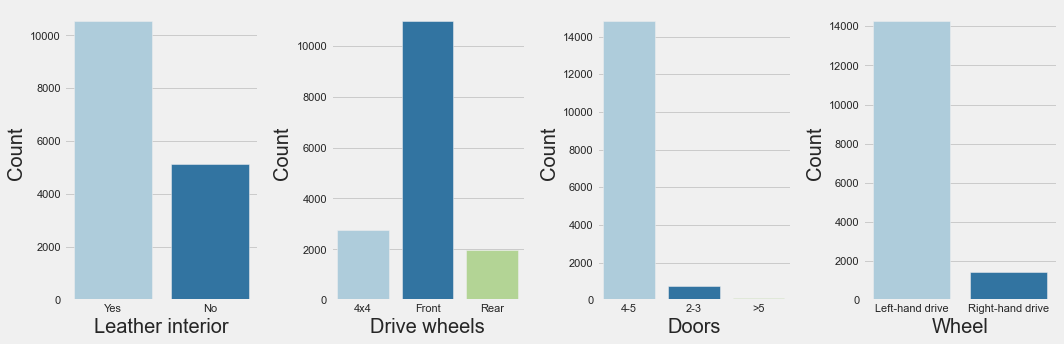

In [32]:
f,ax = plt.subplots(1,4,figsize=(15,5))

col = df_cat.columns
g = sns.countplot(x=col[1],  data=df_cat , palette='Paired' ,ax=ax[0])
g = sns.countplot(x=col[4],  data=df_cat , palette='Paired' ,ax=ax[1])
g = sns.countplot(x=col[5],  data=df_cat , palette='Paired' ,ax=ax[2])
g = sns.countplot(x=col[6],  data=df_cat , palette='Paired' ,ax=ax[3])

ax[0].set_xlabel(col[1] , fontsize=20)
ax[1].set_xlabel(col[4] , fontsize=20)
ax[2].set_xlabel(col[5] , fontsize=20)
ax[3].set_xlabel(col[6] , fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[1].set_ylabel('Count', fontsize=20)
ax[2].set_ylabel('Count', fontsize=20)
ax[3].set_ylabel('Count', fontsize=20)

plt.tight_layout()


### Bar Plot of Frequency 

In [33]:
Category = df['Category'].value_counts().reset_index()
Category.columns = ['Category', 'FREQ']
Category['PERCENTAGE'] = round((Category['FREQ']/Category['FREQ'].sum())*100,2)
Category = Category[0:5]
Category.head(10)

,Category,FREQ,PERCENTAGE
0,Sedan,7003,44.61
1,Jeep,4216,26.86
2,Hatchback,2543,16.20
3,Minivan,534,3.40
4,Coupe,473,3.01


In [34]:
Fueltype = df['Fuel type'].value_counts().reset_index()
Fueltype.columns = ['Fuel type', 'FREQ']
Fueltype['PERCENTAGE'] = round((Fueltype['FREQ']/Fueltype['FREQ'].sum())*100,2)
Fueltype = Fueltype[0:5]
Fueltype.head(10)

,Fuel type,FREQ,PERCENTAGE
0,Petrol,8809,56.12
1,Diesel,3205,20.42
2,Hybrid,2419,15.41
3,LPG,714,4.55
4,CNG,465,2.96


In [35]:
Gearboxtype = df['Gear box type'].value_counts().reset_index()
Gearboxtype.columns = ['Gear box type', 'FREQ']
Gearboxtype['PERCENTAGE'] = round((Gearboxtype['FREQ']/Gearboxtype['FREQ'].sum())*100,2)
Gearboxtype = Gearboxtype[0:5]
Gearboxtype.head(10)

,Gear box type,FREQ,PERCENTAGE
0,Automatic,10075,64.18
1,Tiptronic,3059,19.49
2,Manual,1832,11.67
3,Variator,732,4.66


In [36]:
Color = df['Color'].value_counts().reset_index()
Color.columns = ['Color', 'FREQ']
Color['PERCENTAGE'] = round((Color['FREQ']/Color['FREQ'].sum())*100,2)
Color = Color[0:5]
Color.head(10)

,Color,FREQ,PERCENTAGE
0,Black,3830,24.40
1,White,3602,22.95
2,Silver,3142,20.02
3,Grey,1918,12.22
4,Blue,1243,7.92


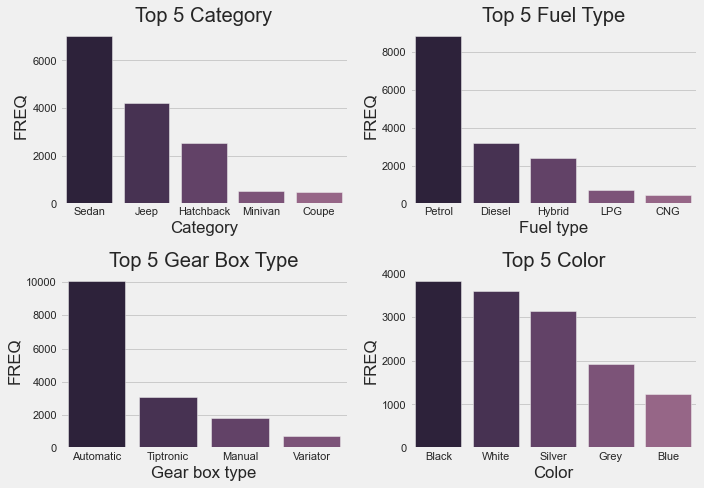

In [37]:
f,ax = plt.subplots(2,2,figsize=(10,7))

g = sns.barplot(x='Category', y ='FREQ', data=Category, ax=ax[0,0], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
g = sns.barplot(x='Fuel type', y ='FREQ', data=Fueltype, ax=ax[0,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
g = sns.barplot(x='Gear box type', y ='FREQ', data=Gearboxtype, ax=ax[1,0], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
g = sns.barplot(x='Color', y ='FREQ', data=Color, ax=ax[1,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))

ax[0,0].set_title('Top 5 Category')
ax[0,1].set_title('Top 5 Fuel Type')
ax[1,0].set_title('Top 5 Gear Box Type')
ax[1,1].set_title('Top 5 Color')


plt.tight_layout()

## Univariate Analysis Numeric

### Box Plot for check Outliers

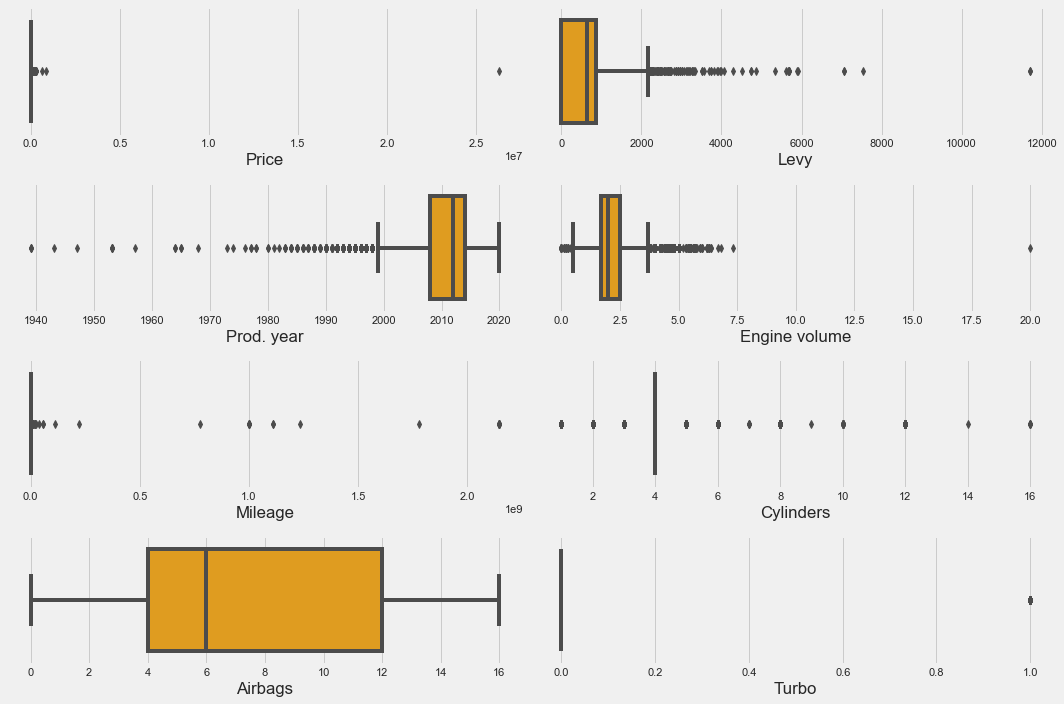

In [38]:
# boxplot visualization for numerical data

numericals = df_num.columns

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

In [39]:
maxprice = df_num['Price'].max()
minprice = df_num['Price'].min()
print('max', maxprice, '& min', minprice)

max 26307500 & min 1


terdapat outliers, harus dinormalkan, pada kolom price, nilai paling tinggi sangat anomali, berbeda sangat jauh, dan nilai mobil 1 juga adalah anomali karena tidak ada mobil dengan harga 1, kolom price harus diolah lebih lanjut.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15698 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15698 non-null  int64  
 1   Levy              15698 non-null  float64
 2   Prod. year        15698 non-null  int64  
 3   Category          15698 non-null  object 
 4   Leather interior  15698 non-null  object 
 5   Fuel type         15698 non-null  object 
 6   Engine volume     15698 non-null  float64
 7   Mileage           15698 non-null  int32  
 8   Cylinders         15698 non-null  float64
 9   Gear box type     15698 non-null  object 
 10  Drive wheels      15698 non-null  object 
 11  Doors             15698 non-null  object 
 12  Wheel             15698 non-null  object 
 13  Color             15698 non-null  object 
 14  Airbags           15698 non-null  int64  
 15  Turbo             15698 non-null  int64  
dtypes: float64(3), int32(1), int64(4), objec

#### Outliers Handling

In [41]:
# #Let's define a function to remove outliers
def iqr(data,x):
    q1 = data[x].quantile(0.25) #1st quartile value
    q3 = data[x].quantile(0.75) #3rd quartile value
    IQR = q3-q1 #Interquartile range
    low = q1-1.5*IQR
    high = q3+1.5*IQR
    data_inc = data.loc[(data[x]>=low) & (data[x]<=high)]
    data_esc = data.loc[(data[x]>low) & (data[x]<high)]
    data = pd.concat([data_inc,data_esc])
    return data
    

In [42]:
l = ['Price','Engine volume', 'Prod. year','Mileage']
for i in l:
    df = iqr(df,i)
df

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left-hand drive,Silver,12,0
1,16621,1018.0,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left-hand drive,Black,8,0
2,8467,0.0,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862.0,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left-hand drive,White,0,0
4,11726,446.0,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left-hand drive,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,50,0.0,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,4-5,Left-hand drive,Silver,6,0
19230,470,645.0,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4-5,Left-hand drive,Silver,12,0
19233,15681,831.0,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left-hand drive,Red,8,0
19234,26108,836.0,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4-5,Left-hand drive,Grey,4,0


#### Box Plot again for check result of outliers Handling

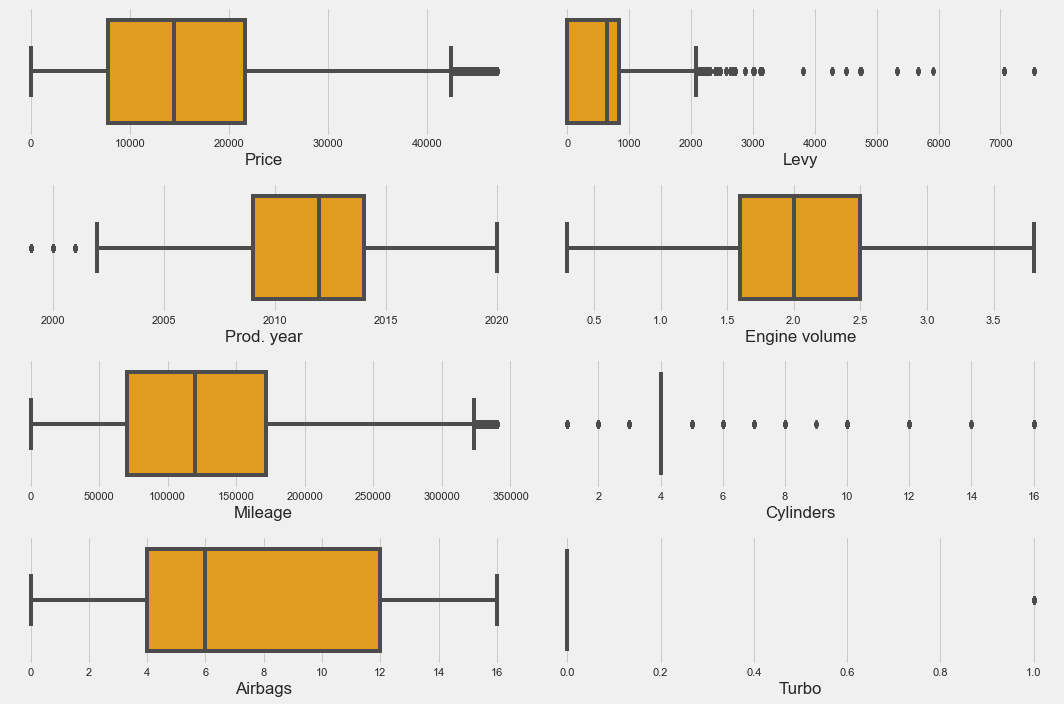

In [43]:
# boxplot visualization for numerical data

numericals = df_num.columns

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

hasil setelah outliers handling, data menjadi lebih masuk akal, distribusi dari kolom ['Price','Engine volume', 'Prod. year','Mileage']  menjadi lebih masuk akal.

In [44]:
df.shape

(206352, 16)

karena metode IQR untuk menghandle outlier, sebelumnya yang data hanya sekitar 15 ribu baris menjadi sekitar 200 ribu baris.

### Dist Plot / Distribustion plot

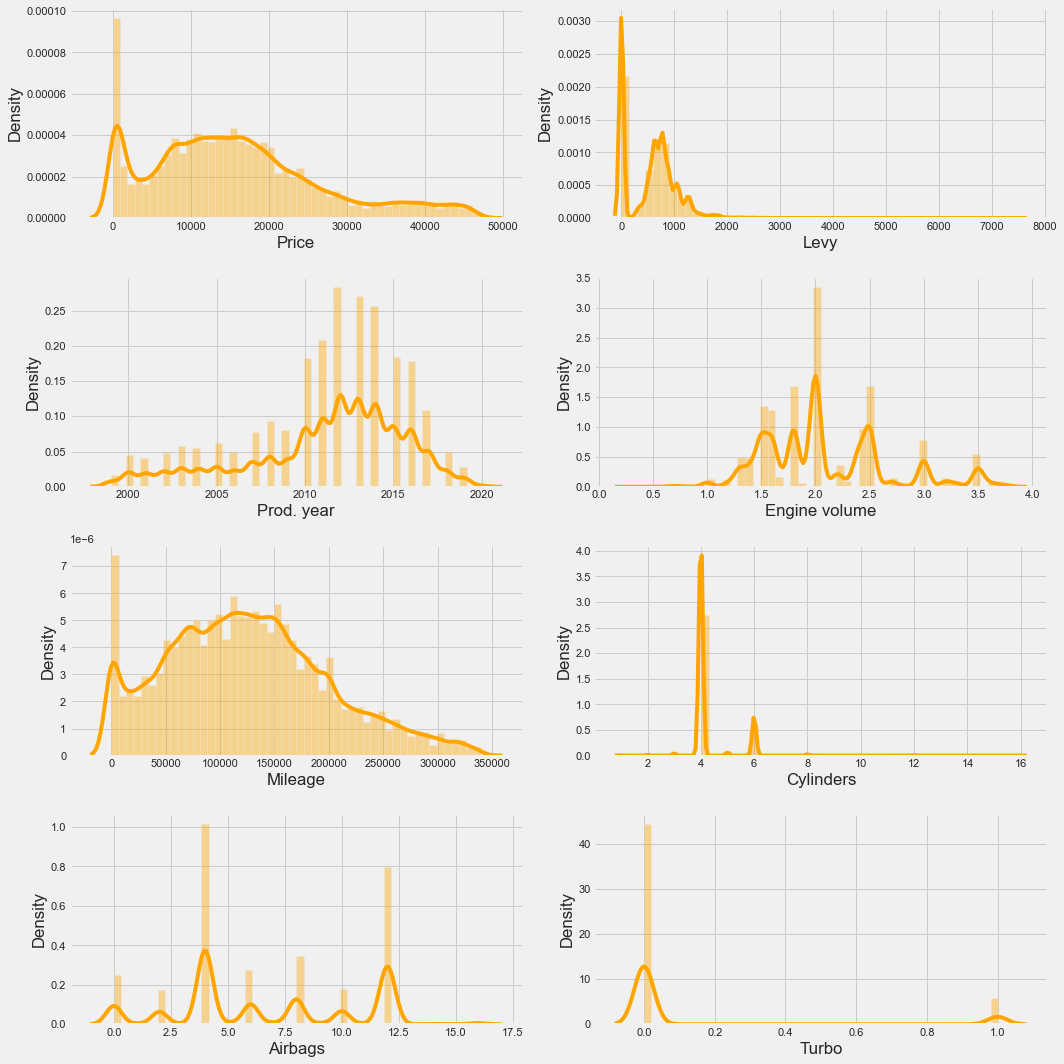

In [45]:
# distribution plot for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)):
    plt.subplot(4, 2,i+1)
    sns.distplot(df[numericals[i]], color='orange')
    plt.tight_layout()

#### Log Transformation on Price
Let's apply log transformation on Price So that its distribution will be near to normal distribution.

In [46]:
df['Price'] = np.log(df['Price']+1)
df['Price']

0         9.497697
1         9.718482
2         9.044050
3         8.190909
4         9.369649
           ...    
19229     3.931826
19230     6.154858
19233     9.660269
19234    10.170035
19236     6.154858
Name: Price, Length: 206352, dtype: float64

#### Distribution Plot Again for check result of Log transformation on Price

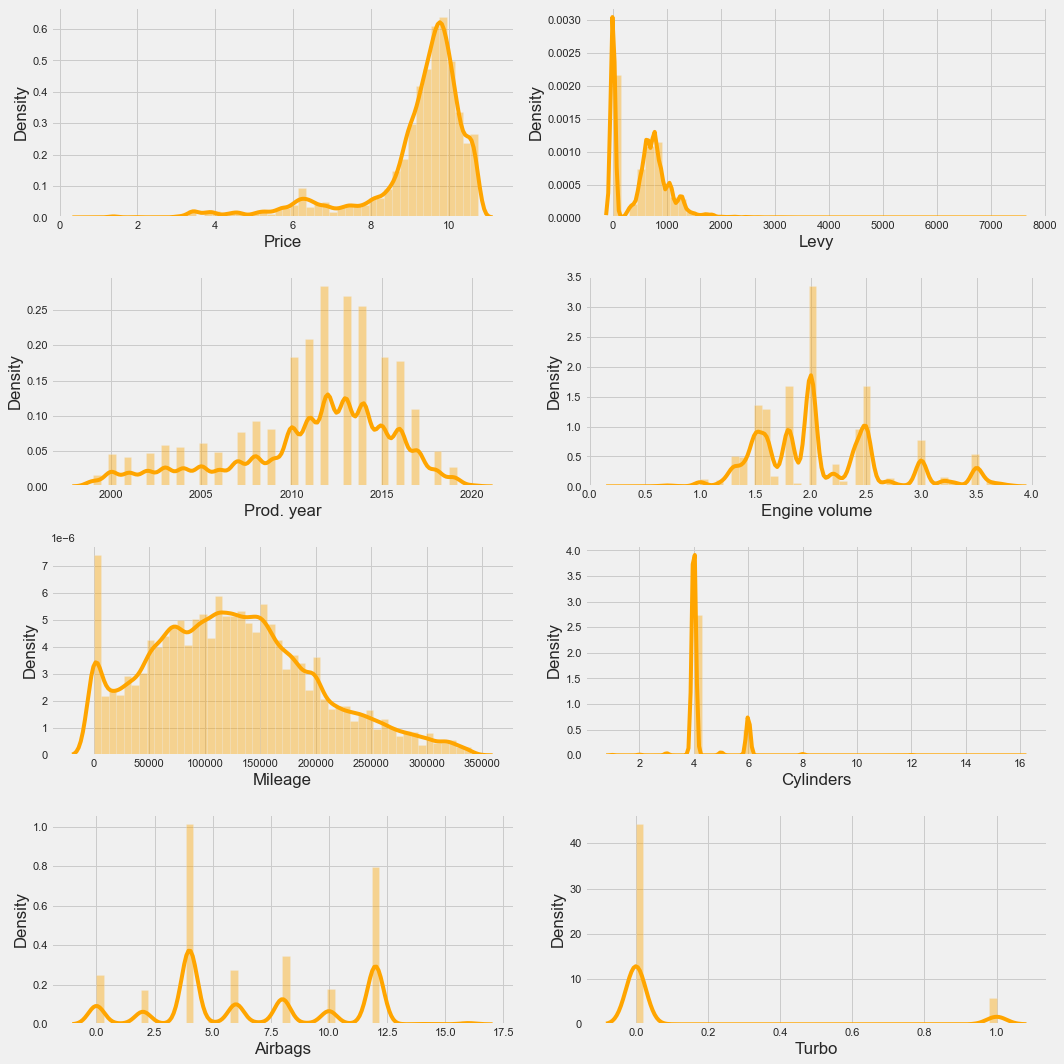

In [47]:
# distribution plot for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)):
    plt.subplot(4, 2,i+1)
    sns.distplot(df[numericals[i]], color='orange')
    plt.tight_layout()

In [48]:
df_num.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo
count,1.569800e+04,15698.000000,15698.000000,15698.000000,1.569800e+04,15698.000000,15698.000000,15698.000000
mean,2.027114e+04,561.190789,2010.520640,2.212479,1.839365e+06,4.482991,6.540578,0.120015
std,2.108159e+05,552.201827,6.011169,0.806030,5.357845e+07,1.133278,4.067114,0.324990
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,7.527000e+03,0.000000,2008.000000,1.700000,6.659750e+04,4.000000,4.000000,0.000000
50%,1.419750e+04,639.000000,2012.000000,2.000000,1.210000e+05,4.000000,6.000000,0.000000
75%,2.333025e+04,862.000000,2014.000000,2.500000,1.800000e+05,4.000000,12.000000,0.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000,1.000000


setelah log transformation kepada Price, distribusi price mendekati normal.

### Reg Plot

In [49]:
df_num.columns

Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Turbo'],
      dtype='object')

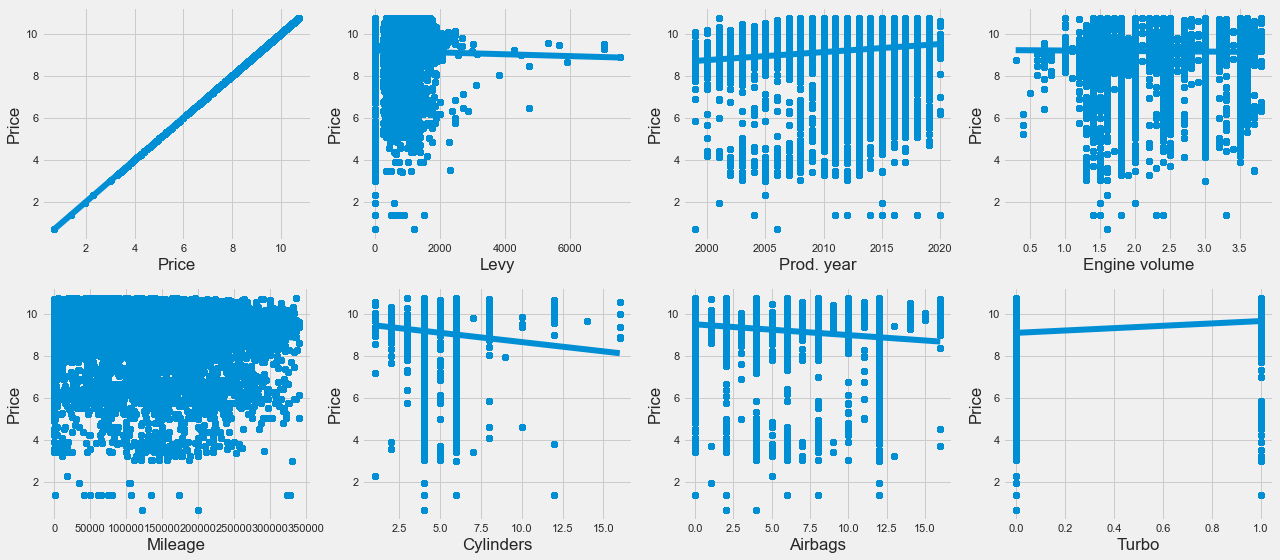

In [50]:
fig,ax = plt.subplots(2,4,figsize=(18,8))
col = df_num.columns

g = sns.regplot(x=col[0], y=col[0], data=df, ax=ax[0,0])
g = sns.regplot(x=col[1], y=col[0], data=df, ax=ax[0,1])
g = sns.regplot(x=col[2], y=col[0], data=df, ax=ax[0,2])
g = sns.regplot(x=col[3], y=col[0], data=df, ax=ax[0,3])
g = sns.regplot(x=col[4], y=col[0], data=df, ax=ax[1,0])
g = sns.regplot(x=col[5], y=col[0], data=df, ax=ax[1,1])
g = sns.regplot(x=col[6], y=col[0], data=df, ax=ax[1,2])
g = sns.regplot(x=col[7], y=col[0], data=df, ax=ax[1,3])

plt.tight_layout()

## Multivariate Analysis

<AxesSubplot:>

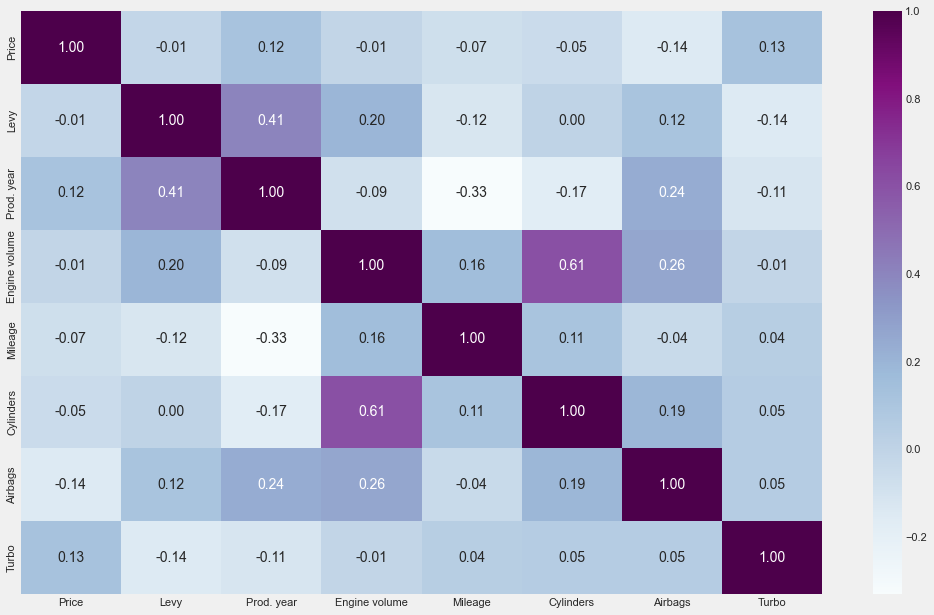

In [51]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

hubungan antar variabel tidak lebih dari 60 % menunjukkan  kemungkinan ada multikoliniearitas, 
Inferensi: Ada korelasi tinggi antara volume mesin dan silinder. Mari kita jatuhkan silinder karena volume mesin cukup untuk menjelaskan volume.

### Drop High Correlation

In [52]:
#Dropping Cylinders
df.drop('Cylinders',axis=1,inplace=True)
df

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,9.497697,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,4x4,4-5,Left-hand drive,Silver,12,0
1,9.718482,1018.0,2011,Jeep,No,Petrol,3.0,192000,Tiptronic,4x4,4-5,Left-hand drive,Black,8,0
2,9.044050,0.0,2006,Hatchback,No,Petrol,1.3,200000,Variator,Front,4-5,Right-hand drive,Black,2,0
3,8.190909,862.0,2011,Jeep,Yes,Hybrid,2.5,168966,Automatic,4x4,4-5,Left-hand drive,White,0,0
4,9.369649,446.0,2014,Hatchback,Yes,Petrol,1.3,91901,Automatic,Front,4-5,Left-hand drive,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,3.931826,0.0,2008,Hatchback,No,Hybrid,1.5,150000,Automatic,Front,4-5,Left-hand drive,Silver,6,0
19230,6.154858,645.0,2011,Hatchback,Yes,Hybrid,1.8,307325,Automatic,Front,4-5,Left-hand drive,Silver,12,0
19233,9.660269,831.0,2011,Sedan,Yes,Petrol,2.4,161600,Tiptronic,Front,4-5,Left-hand drive,Red,8,0
19234,10.170035,836.0,2010,Jeep,Yes,Diesel,2.0,116365,Automatic,Front,4-5,Left-hand drive,Grey,4,0


### Pair Plot

In [53]:
# plt.figure(figsize=(16,10))
# sns.pairplot(df,
#             #  hue='Turbo',
#              corner=True)



# Data Preprocessing - Encoding

## Label Encoding

In [54]:
df.head(2)

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,9.497697,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,4x4,4-5,Left-hand drive,Silver,12,0
1,9.718482,1018.0,2011,Jeep,No,Petrol,3.0,192000,Tiptronic,4x4,4-5,Left-hand drive,Black,8,0


In [55]:
df_cat.describe()

,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
count,15698,15698,15698,15698,15698,15698,15698,15698
unique,11,2,7,4,3,3,2,16
top,Sedan,Yes,Petrol,Automatic,Front,4-5,Left-hand drive,Black
freq,7003,10542,8809,10075,10976,14831,14268,3830


In [56]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [57]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Leather interior'.
df['Leather interior']= label_encoder.fit_transform(df['Leather interior'])
df['Wheel']= label_encoder.fit_transform(df['Wheel'])

In [58]:
df.head(2)

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,9.497697,1399.0,2010,Jeep,1,Hybrid,3.5,186005,Automatic,4x4,4-5,0,Silver,12,0
1,9.718482,1018.0,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,4x4,4-5,0,Black,8,0


## One Hot Encoding

In [59]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print('\nKita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.select_dtypes(include=object).shape[1],'kolom kateogorik')
print('kolom numerik pada data ==> ', list(df.select_dtypes(include=object).columns),' \n')
df_cat = df.select_dtypes(include=object)

rows = []
for col in df_cat :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Data Type': df[col].dtypes,
            'Unique Values':  df[col].unique()
        }
  )
pd.options.display.max_colwidth = 170 #maksimal tampil 170 karakter
# pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
print('\nInformasi Kolom Kategori : \n') 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)



Kita dapat mengamati bahwa data memiliki 206352 baris dan memiliki 6 kolom kateogorik
kolom numerik pada data ==>  ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color']  


Informasi Kolom Kategori : 



,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,Color,16,object,"[Silver, Black, White, Grey, Blue, Sky blue, Red, Green, Yellow, Brown, Golden, Beige, Orange, Carnelian red, Purple, Pink]"
1,Category,11,object,"[Jeep, Hatchback, Sedan, Microbus, Goods wagon, Universal, Coupe, Minivan, Cabriolet, Pickup, Limousine]"
2,Fuel type,7,object,"[Hybrid, Petrol, Diesel, Plug-in Hybrid, CNG, LPG, Hydrogen]"
3,Gear box type,4,object,"[Automatic, Tiptronic, Variator, Manual]"
4,Drive wheels,3,object,"[4x4, Front, Rear]"
5,Doors,3,object,"[4-5, 2-3, >5]"


In [60]:
# lihat sekilas hasil One hot encode column ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color'] dan definisikan ke one_hot_columns
one_hot_columns = pd.get_dummies(df[['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color']])

#kode singkat dari kode di atas
# one_hot_columns = pd.get_dummies(object_columns)

In [61]:
# kolom kolom yang berada dalam one_hot_columns   ingin di one hot encoding
dumies_one_hot_encod = one_hot_columns 

# bagian one hot encoding dari kolom Contract dan PaymenMethod
df = pd.concat([df, dumies_one_hot_encod], axis = 1)

# # hapus kolom yang berada di dalam one_hot_columns  dari dataframe awal
df.drop(['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color'], axis = 1, inplace = True)

df.head()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Category_Cabriolet,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,9.497697,1399.0,2010,1,3.5,186005,0,12,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9.718482,1018.0,2011,0,3.0,192000,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.044050,0.0,2006,0,1.3,200000,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.190909,862.0,2011,1,2.5,168966,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9.369649,446.0,2014,1,1.3,91901,0,4,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
print('\nKita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.select_dtypes(include=numerics).shape[1],'kolom numerik')
print('kolom numerik pada data ==> ', list(df.select_dtypes(include=numerics).columns),' \n')
df_num = df.select_dtypes(include=numerics)

print('\nKita dapat mengamati bahwa data memiliki',df.shape[0],'baris dan memiliki', df.select_dtypes(include=object).shape[1],'kolom kateogorik')
print('kolom Kategorik yg masih dalam bentuk String pada data ==> ', list(df.select_dtypes(include=object).columns),' \n')
df_cat = df.select_dtypes(include=object)

rows = []
for col in df :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Data Type': df[col].dtypes,
            'Unique Values':  df[col].unique()
        }
  )
pd.options.display.max_colwidth = 170 #maksimal tampil 170 karakter
# pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
print('\nInformasi Kolom Kategori : \n') 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)



Kita dapat mengamati bahwa data memiliki 206352 baris dan memiliki 53 kolom numerik
kolom numerik pada data ==>  ['Price', 'Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Wheel', 'Airbags', 'Turbo', 'Category_Cabriolet', 'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Automatic', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4', 'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_2-3', 'Doors_4-5', 'Doors_>5', 'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver', '

,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,Mileage,6478,int32,"[186005, 192000, 200000, 168966, 91901, 160931, 258909, 216118, 128500, 184467, 138038, 74146, 121840, 54317, 295059, 112645, 187000, 39709, 230000, 210000, 169000, 1..."
1,Price,1798,float64,"[9.497697391604019, 9.718482398112972, 9.044049632254756, 8.190908881182514, 9.369649154461065, 10.583904040617256, 7.4977617006225685, 6.309918278226516, 10.19084457..."
2,Levy,423,float64,"[1399.0, 1018.0, 0.0, 862.0, 446.0, 891.0, 761.0, 751.0, 1053.0, 1055.0, 1079.0, 810.0, 2386.0, 531.0, 586.0, 1249.0, 583.0, 1288.0, 915.0, 1750.0, 707.0, 1486.0, 109..."
3,Engine volume,34,float64,"[3.5, 3.0, 1.3, 2.5, 2.0, 1.8, 2.4, 3.3, 1.6, 2.2, 1.5, 1.4, 3.6, 2.3, 3.2, 3.8, 1.2, 1.7, 2.9, 0.5, 1.9, 0.4, 2.8, 2.1, 0.7, 2.7, 3.7, 1.0, 2.6, 0.8, 3.4, 1.1, 0.6, ..."
4,Prod. year,22,int64,"[2010, 2011, 2006, 2014, 2016, 2013, 2007, 2018, 2012, 2017, 2001, 2008, 2015, 2004, 2009, 2019, 2005, 2003, 1999, 2002, 2000, 2020]"
5,Airbags,17,int64,"[12, 8, 2, 0, 4, 10, 6, 3, 1, 16, 7, 9, 5, 11, 14, 15, 13]"
6,Color_Brown,2,uint8,"[0, 1]"
7,Drive wheels_4x4,2,uint8,"[1, 0]"
8,Drive wheels_Front,2,uint8,"[0, 1]"
9,Drive wheels_Rear,2,uint8,"[0, 1]"


# Copy The Dataset

In [63]:
databaseline = df.copy()

# Train-Test-Split & Feature scaling

In [64]:
X = databaseline.drop('Price',axis=1)
y = databaseline['Price']

In [65]:
#Test-Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
#Shapes
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(144446, 52) (61906, 52) (144446,) (61906,)


In [67]:
#Using Standard scaler to scale all numerical features
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [68]:
cols = X_train.columns.tolist()
cols

['Levy',
 'Prod. year',
 'Leather interior',
 'Engine volume',
 'Mileage',
 'Wheel',
 'Airbags',
 'Turbo',
 'Category_Cabriolet',
 'Category_Coupe',
 'Category_Goods wagon',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Limousine',
 'Category_Microbus',
 'Category_Minivan',
 'Category_Pickup',
 'Category_Sedan',
 'Category_Universal',
 'Fuel type_CNG',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_Hydrogen',
 'Fuel type_LPG',
 'Fuel type_Petrol',
 'Fuel type_Plug-in Hybrid',
 'Gear box type_Automatic',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_4x4',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Doors_2-3',
 'Doors_4-5',
 'Doors_>5',
 'Color_Beige',
 'Color_Black',
 'Color_Blue',
 'Color_Brown',
 'Color_Carnelian red',
 'Color_Golden',
 'Color_Green',
 'Color_Grey',
 'Color_Orange',
 'Color_Pink',
 'Color_Purple',
 'Color_Red',
 'Color_Silver',
 'Color_Sky blue',
 'Color_White',
 'Color_Yellow']

In [69]:
#scaling the train and test data (independent features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[cols])
X_test = scaler.transform(X_test[cols])

In [70]:
#scaling the dependent features
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))

# Linear regression model

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

In [72]:
#Making predictions on train data
y_pred_train = lr.predict(X_train)
y_pred_train

array([[ 0.31907742],
       [-0.19166476],
       [-0.17726047],
       ...,
       [ 0.21580594],
       [ 0.33738797],
       [-0.0632468 ]])

In [73]:
#Making predictions on test data
y_pred_test = lr.predict(X_test)
y_pred_test

array([[ 0.54393094],
       [-0.53077609],
       [ 0.11375516],
       ...,
       [-0.06080539],
       [-0.41053302],
       [ 0.29686063]])

In [74]:
#Applying inverse transform
y_pred_train_org = scaler.inverse_transform(y_pred_train)
y_pred_test_org = scaler.inverse_transform(y_pred_test)
y_train_org = scaler.inverse_transform(y_train)
y_test_org = scaler.inverse_transform(y_test)

Text(0, 0.5, 'Residuals')

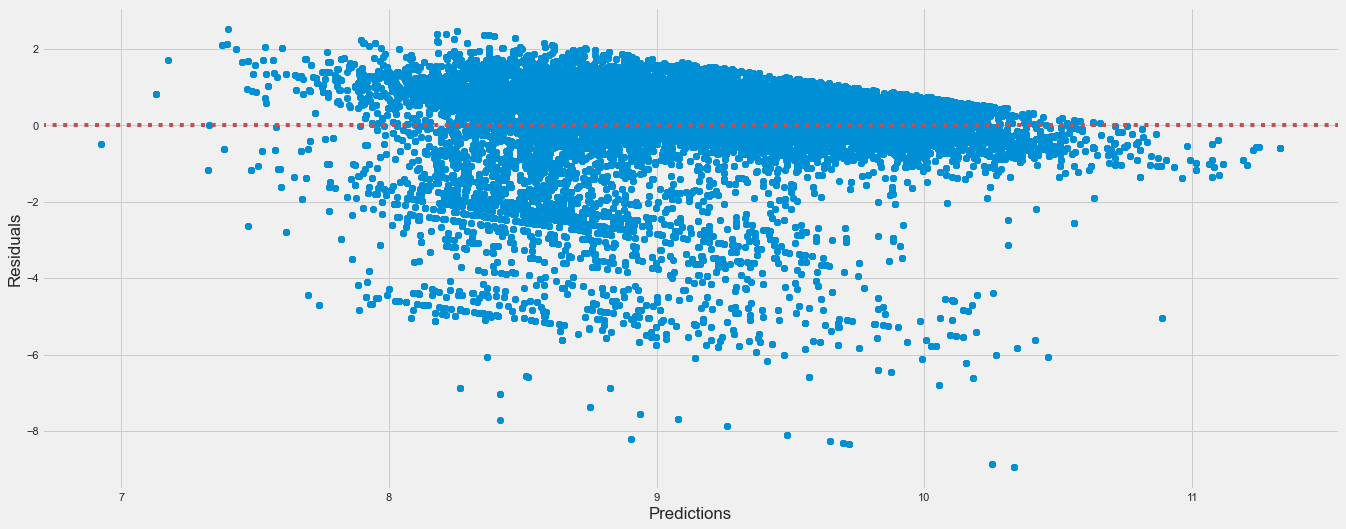

In [75]:
#residuals
y_res = y_train_org - y_pred_train_org
#Visualizing residuals vs predictions
plt.scatter( y_pred_train_org , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")

Text(0, 0.5, 'Predicted values')

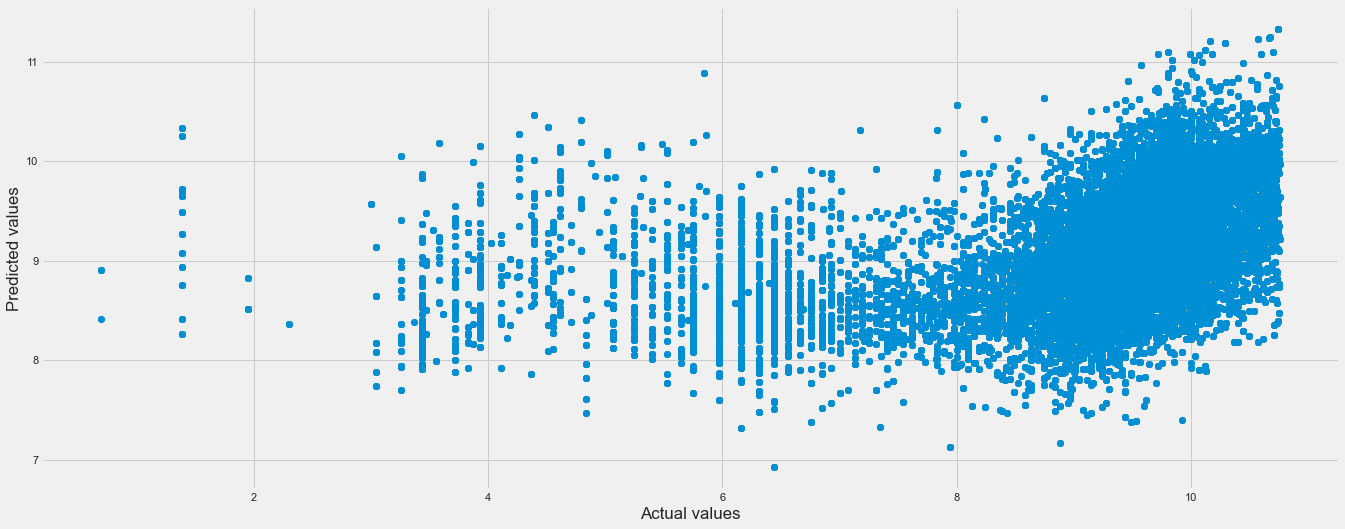

In [76]:
#actual vs predicted
plt.scatter(y_train_org,y_pred_train_org)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

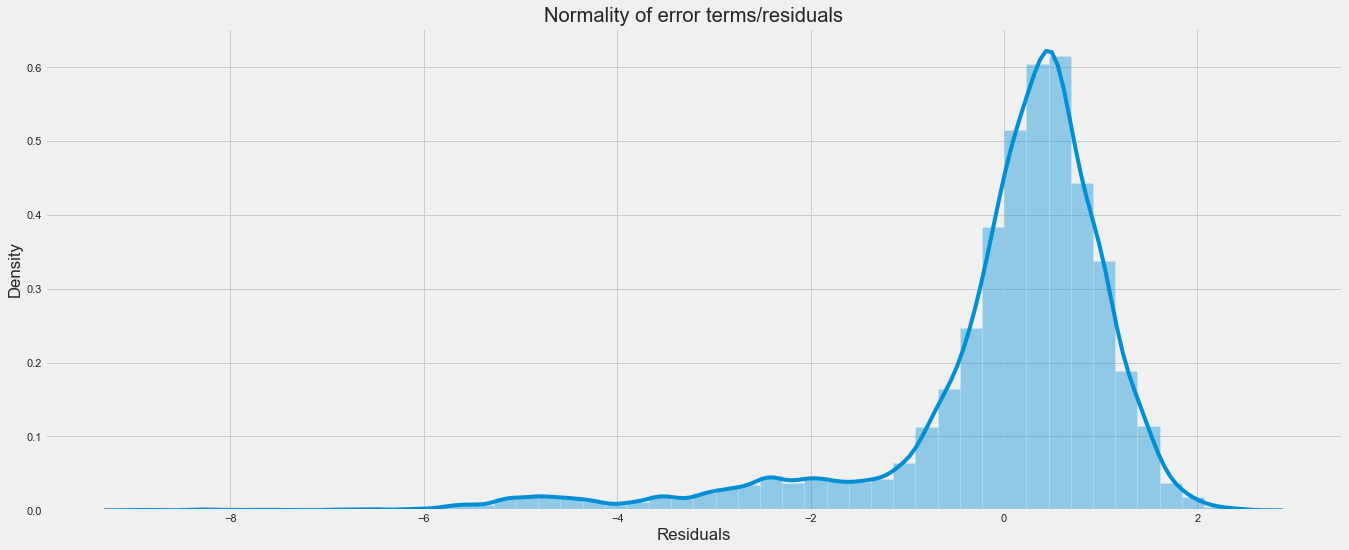

In [77]:
#Let's check the distribution of error terms
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Inferences:</br>

1. Residuals are not independent. 
2. They don't have constant variance.
3. Having a nearly normal distribution.

Thus, this model not satisfying the linear regression assumptions completely. Let's check the r2score and rmsle metrics.

In [78]:
#Calculating r2_score and rmsle score
from sklearn.metrics import mean_squared_log_error, r2_score
r2_train_lr = r2_score(y_train_org, y_pred_train_org)
r2_test_lr = r2_score(y_test_org, y_pred_test_org)
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(r2_train_lr,r2_test_lr))
print('********************************************************************************************')

rmsle_train_lr = np.sqrt(mean_squared_log_error(y_train_org, y_pred_train_org))
rmsle_test_lr = np.sqrt(mean_squared_log_error(y_test_org, y_pred_test_org))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train_lr,rmsle_test_lr))

R2 score for train set: 0.18119199755350113 & R2 score for test set: 0.18872024382803354
********************************************************************************************
RMSLE score for train set: 0.16236768806917007 & RMSLE score for test set: 0.16139583084116257


In [79]:
#Storing results in a data frame
result = pd.DataFrame({'Algorithm used':['Linear Regression'],'R2score of train data':[r2_train_lr],
                       'R2score of test data':[r2_test_lr],'RMSLE of train data':[rmsle_train_lr],
                       'RMSLE of test data':[rmsle_test_lr]})
result

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data
0,Linear Regression,0.181192,0.18872,0.162368,0.161396


In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

r2_train_lr = r2_score(y_train_org, y_pred_train_org)
r2_test_lr = r2_score(y_test_org, y_pred_test_org)

rmsle_train_lr = np.sqrt(mean_squared_log_error(y_train_org, y_pred_train_org))
rmsle_test_lr = np.sqrt(mean_squared_log_error(y_test_org, y_pred_test_org))

rmse_train_lr = np.sqrt(mean_squared_error(y_train_org, y_pred_train_org))
rmse_test_lr = np.sqrt(mean_squared_error(y_test_org, y_pred_test_org))

mae_train_lr = mean_absolute_error(y_train_org, y_pred_train_org) 
mae_test_lr = mean_absolute_error(y_test_org, y_pred_test_org)

mape_train_lr = mean_absolute_percentage_error(y_train_org, y_pred_train_org)
mape_test_lr = mean_absolute_percentage_error(y_test_org, y_pred_test_org)


In [81]:
#Storing results in a data frame
result2 = pd.DataFrame({'Algorithm used':['Linear Regression'],
                        'R2score of train data':[r2_train_lr],
                       'R2score of test data':[r2_test_lr],
                        'RMSLE of train data':[rmsle_train_lr],
                       'RMSLE of test data':[rmsle_test_lr],
                        'RMSE of train data':[rmse_train_lr],
                        'RMSE of test data':[rmse_test_lr],
                        'MAE of train data':[mae_train_lr],
                        'MAE of test data':[mae_test_lr],
                        'MAPE of train data':[mape_train_lr],
                        'MAPE of test data':[mape_test_lr]
                        })
result2

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data,RMSE of train data,RMSE of test data,MAE of train data,MAE of test data,MAPE of train data,MAPE of test data
0,Linear Regression,0.181192,0.18872,0.162368,0.161396,1.283254,1.278172,0.846279,0.845698,0.124897,0.124423


# Ridge regression model

## Split data: train-validation-test

In [82]:
databaseline2 = databaseline.copy()

In [83]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='Price')
target = df[['Price']]

feature_price_pretrain, feature_price_test, target_price_pretrain, target_price_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_price_train, feature_price_validation, target_price_train, target_price_validation = train_test_split(feature_price_pretrain, target_price_pretrain, test_size=0.20, random_state=42)

## Drop Multicollinear Features

In [84]:
# feature_price_train = feature_price_train.drop(columns=['indus','nox','dis','rad','tax'])
# feature_price_validation = feature_price_validation.drop(columns=['indus','nox','dis','rad','tax'])
# feature_price_test = feature_price_test.drop(columns=['indus','nox','dis','rad','tax'])

## Train Multiple Models (Ridge)
with different alpha (lambda)

In [85]:
from sklearn.linear_model import Ridge

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_price_train, y_price_train)
ridge_reg_pointone.fit(X_price_train, y_price_train)
ridge_reg_one.fit(X_price_train, y_price_train)
ridge_reg_ten.fit(X_price_train, y_price_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha) - (Ridge)
Based on validation set

In [86]:
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 1.2739035678988566
RMSE of Ridge regression model with alpha = 0.1 is 1.2739035897514184
RMSE of Ridge regression model with alpha = 1.0 is 1.2739050851976357
RMSE of Ridge regression model with alpha = 10 is 1.2739340452202084


The best Lamda is 0.01

## Coefficient Tour - (Ridge)

In [87]:
model = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1.221262e+02
1,Levy,-1.311840e-04
2,Prod. year,6.590473e-02
3,Leather interior,-2.285007e-01
4,Engine volume,4.647530e-02
5,Mileage,-8.389642e-07
6,Wheel,-5.252003e-01
7,Airbags,-7.296565e-02
8,Turbo,3.225217e-01
9,Category_Cabriolet,1.762967e-01


In [88]:
# model = ridge_reg_pointone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [89]:
# model = ridge_reg_one

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [90]:
# model = ridge_reg_ten

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_price_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

the best lamda is 0.10

In [91]:
col_one_list_feature = coef_df['feature'].tolist()
col_one_list_coefficient = round(coef_df['coefficient'], 3).tolist()
# print(col_one_list_feature)
# print(col_one_list_coefficient)

import itertools 
# iterates over 2 lists and till all are exhausted
print('price = ')
for (a, b) in itertools.zip_longest(col_one_list_feature, col_one_list_coefficient):
    print (b, a, "+")


price = 
-122.126 intercept +
-0.0 Levy +
0.066 Prod. year +
-0.229 Leather interior +
0.046 Engine volume +
-0.0 Mileage +
-0.525 Wheel +
-0.073 Airbags +
0.323 Turbo +
0.176 Category_Cabriolet +
0.07 Category_Coupe +
-0.675 Category_Goods wagon +
-0.388 Category_Hatchback +
0.054 Category_Jeep +
1.414 Category_Limousine +
-0.489 Category_Microbus +
0.041 Category_Minivan +
-0.074 Category_Pickup +
-0.296 Category_Sedan +
0.168 Category_Universal +
-0.022 Fuel type_CNG +
0.174 Fuel type_Diesel +
-0.36 Fuel type_Hybrid +
-0.074 Fuel type_Hydrogen +
-0.062 Fuel type_LPG +
-0.328 Fuel type_Petrol +
0.672 Fuel type_Plug-in Hybrid +
-0.424 Gear box type_Automatic +
-0.215 Gear box type_Manual +
0.449 Gear box type_Tiptronic +
0.19 Gear box type_Variator +
-0.253 Drive wheels_4x4 +
0.12 Drive wheels_Front +
0.133 Drive wheels_Rear +
-0.066 Doors_2-3 +
0.086 Doors_4-5 +
-0.021 Doors_>5 +
0.067 Color_Beige +
-0.054 Color_Black +
-0.118 Color_Blue +
-0.085 Color_Brown +
0.139 Color_Carnelian r

## Model Evaluation - (Ridge)

In [92]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1.221262e+02
1,Levy,-1.311840e-04
2,Prod. year,6.590473e-02
3,Leather interior,-2.285007e-01
4,Engine volume,4.647530e-02
5,Mileage,-8.389642e-07
6,Wheel,-5.252003e-01
7,Airbags,-7.296565e-02
8,Turbo,3.225217e-01
9,Category_Cabriolet,1.762967e-01


In [93]:
# ridge_best = ridge_reg_ten

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_price_train.columns.tolist(),
#     'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
# })

# coef_df

### Diagnostic Study

In [94]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_price_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_price_train)))

R-squared for training data is -3.49013315254025


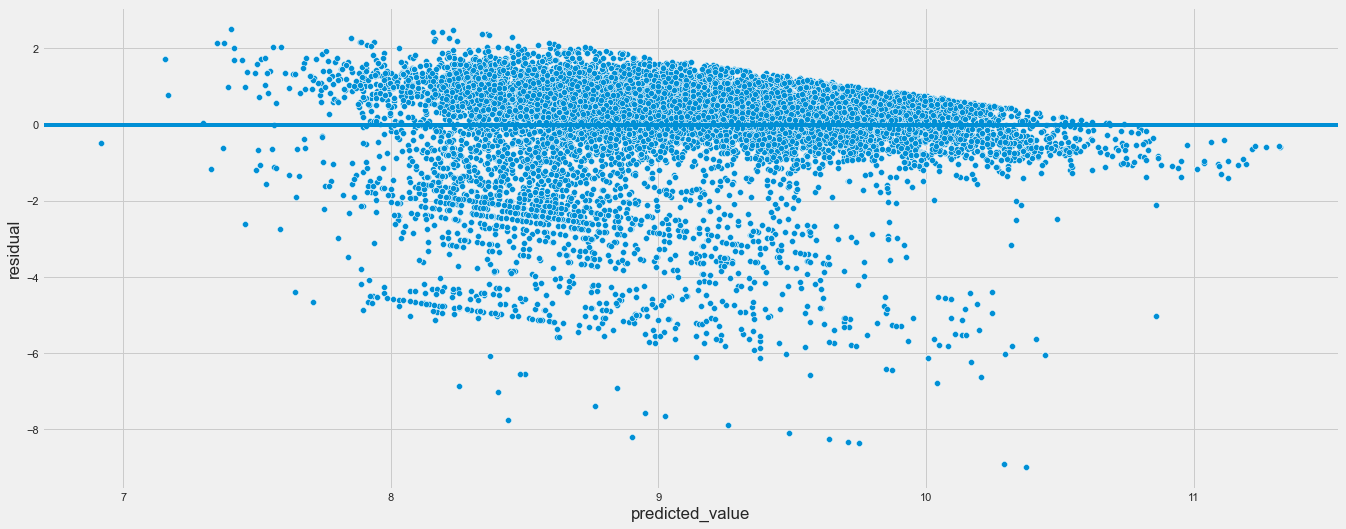

In [95]:
# calculate residuals
residual = y_price_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [96]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_price_train)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_price_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_price_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_price_train)))

RMSE for training data is 1.285812211998918
MAE for training data is 0.8491339607391868
MAPE for training data is 0.09512641371846856


### Testing Error

In [98]:
# prepare prediction result on test data
X_price_test = feature_price_test.to_numpy()
y_predict_test = ridge_best.predict(X_price_test)

# ground truth target
y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_price_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_price_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_price_test)))

RMSE for testing data is 1.2743252860659855
MAE for testing data is 0.8427074877282544
MAPE for testing data is 0.0944340769964806


interpretation :

model Ridge Regression nya cendrung acceptable, karena RMSE dari training data mirip-mirip dengan test data, Mape di training dan test data tidak lebih dari 30 % maka tidak underfit, namun r2 minus, model ridge regression tidak dapat digunakan.

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

r2_train_rr = r2_score(y_predict_train, y_price_train)
r2_test_rr = r2_score(y_predict_test, y_price_test)

rmsle_train_rr = np.sqrt(mean_squared_log_error(y_predict_train, y_price_train))
rmsle_test_rr = np.sqrt(mean_squared_log_error(y_predict_test, y_price_test))

rmse_train_rr = np.sqrt(mean_squared_error(y_predict_train, y_price_train))
rmse_test_rr = np.sqrt(mean_squared_error(y_predict_test, y_price_test))

mae_train_rr = mean_absolute_error(y_predict_train, y_price_train) 
mae_test_rr = mean_absolute_error(y_predict_test, y_price_test)

mape_train_rr = mean_absolute_percentage_error(y_predict_train, y_price_train)
mape_test_rr = mean_absolute_percentage_error(y_predict_test, y_price_test)


In [101]:
#Storing results in a data frame
result2 = pd.DataFrame({'Algorithm used':['Ridge Regression'],
                        'R2score of train data':[r2_train_rr],
                       'R2score of test data':[r2_test_rr],
                        'RMSLE of train data':[rmsle_train_rr],
                       'RMSLE of test data':[rmsle_test_rr],
                        'RMSE of train data':[rmse_train_rr],
                        'RMSE of test data':[rmse_test_rr],
                        'MAE of train data':[mae_train_rr],
                        'MAE of test data':[mae_test_rr],
                        'MAPE of train data':[mape_train_rr],
                        'MAPE of test data':[mape_test_rr]
                        })
result2

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data,RMSE of train data,RMSE of test data,MAE of train data,MAE of test data,MAPE of train data,MAPE of test data
0,Ridge Regression,-3.490133,-3.398392,0.162686,0.160769,1.285812,1.274325,0.849134,0.842707,0.095126,0.094434


# Random Forest

In [102]:
based = df.copy()

In [103]:
x = based.drop('Price',axis=1)
y = based['Price']

In [104]:
x.shape, y.shape

((206352, 52), (206352,))

In [105]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = databaseline.drop('Price',axis=1).to_numpy()
y = databaseline['Price'].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rf_r = RandomForestRegressor(random_state=42)

In [107]:
X, y = make_regression(n_features=20, random_state=0)
rfr = RandomForestRegressor(max_depth=20,min_samples_leaf=5)

In [108]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5)

In [109]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

In [110]:
#Predictions and evaluation
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(r2_score_train,r2_score_test))
print('********************************************************************************************')
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

R2 score for train set: 0.9627842637727198 & R2 score for test set: 0.9595191749387469
********************************************************************************************
RMSLE score for train set: 0.03613103214254754 & RMSLE score for test set: 0.03758464006499548


In [111]:
#Predictions and evaluation

r2_train_rfr = r2_score(y_train, y_pred_train)
r2_test_rfr = r2_score(y_test, y_pred_test)

rmsle_train_rfr = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test_rfr = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

rmse_train_rfr = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_rfr = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train_rfr = mean_absolute_error(y_train, y_pred_train) 
mae_test_rfr = mean_absolute_error(y_test, y_pred_test)

mape_train_rfr = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test_rfr = mean_absolute_percentage_error(y_test, y_pred_test)

#Storing results in a data frame
result2 = pd.DataFrame({'Algorithm used':['Random Forest regressor'],
                        'R2score of train data':[r2_train_rfr],
                       'R2score of test data':[r2_test_rfr],
                        'RMSLE of train data':[rmsle_train_rfr],
                       'RMSLE of test data':[rmsle_test_rfr],
                        'RMSE of train data':[rmse_train_rfr],
                        'RMSE of test data':[rmse_test_rfr],
                        'MAE of train data':[mae_train_rfr],
                        'MAE of test data':[mae_test_rfr],
                        'MAPE of train data':[mape_train_rfr],
                        'MAPE of test data':[mape_test_rfr]
                        })
result2

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data,RMSE of train data,RMSE of test data,MAE of train data,MAE of test data,MAPE of train data,MAPE of test data
0,Random Forest regressor,0.962784,0.959519,0.036131,0.037585,0.273812,0.284638,0.11645,0.123998,0.015959,0.017115


# Lasso regression model

## Split data: train-validation-test

In [112]:
databaseline2 = databaseline.copy()

In [113]:
# # split train test
# from sklearn.model_selection import train_test_split

# feature = databaseline2.drop(columns='Price')
# target = databaseline2[['Price']]

# feature_price_pretrain, feature_price_test, target_price_pretrain, target_price_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# feature_price_train, feature_price_validation, target_price_train, target_price_validation = train_test_split(feature_price_pretrain, target_price_pretrain, test_size=0.20, random_state=42)

In [114]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='Price')
target = df[['Price']]

feature_price_pretrain, feature_price_test, target_price_pretrain, target_price_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_price_train, feature_price_validation, target_price_train, target_price_validation = train_test_split(feature_price_pretrain, target_price_pretrain, test_size=0.20, random_state=42)

## Drop Multicollinear Features

In [115]:
# feature_price_train = feature_price_train.drop(columns=['indus','nox','dis','rad','tax'])
# feature_price_validation = feature_price_validation.drop(columns=['indus','nox','dis','rad','tax'])
# feature_price_test = feature_price_test.drop(columns=['indus','nox','dis','rad','tax'])

## Train Multiple Models (Lasso)
with different alpha (lambda)

In [116]:
from sklearn.linear_model import Lasso

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_price_train, y_price_train)
lasso_reg_pointone.fit(X_price_train, y_price_train)
lasso_reg_one.fit(X_price_train, y_price_train)
lasso_reg_ten.fit(X_price_train, y_price_train)

Lasso(alpha=10, random_state=42)

## Find the best model (alpha) - (Lasso)
Based on validation set

In [117]:
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of lasso regression model with alpha = {alpha} is {rmse}')

RMSE of lasso regression model with alpha = 0.01 is 1.2867980668359966
RMSE of lasso regression model with alpha = 0.1 is 1.3571316624916834
RMSE of lasso regression model with alpha = 1.0 is 1.4048666075601963
RMSE of lasso regression model with alpha = 10 is 1.4050418537201335


The best Lamda is 0.01

## Coefficient Tour - (Ridge)

In [118]:
model = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1.259426e+02
1,Levy,-1.535627e-04
2,Prod. year,6.766433e-02
3,Leather interior,-8.581207e-02
4,Engine volume,6.094418e-03
5,Mileage,-7.682083e-07
6,Wheel,-3.123832e-01
7,Airbags,-6.980123e-02
8,Turbo,1.400627e-01
9,Category_Cabriolet,0.000000e+00


In [119]:
# model = ridge_reg_pointone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [120]:
# model = ridge_reg_one

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [121]:
# model = ridge_reg_ten

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_price_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

the best lamda is 0.10

In [122]:
col_one_list_feature = coef_df['feature'].tolist()
col_one_list_coefficient = round(coef_df['coefficient'], 3).tolist()
# print(col_one_list_feature)
# print(col_one_list_coefficient)

import itertools 
# iterates over 2 lists and till all are exhausted
print('price = ')
for (a, b) in itertools.zip_longest(col_one_list_feature, col_one_list_coefficient):
    print (b, a, "+")


price = 
-125.943 intercept +
-0.0 Levy +
0.068 Prod. year +
-0.086 Leather interior +
0.006 Engine volume +
-0.0 Mileage +
-0.312 Wheel +
-0.07 Airbags +
0.14 Turbo +
0.0 Category_Cabriolet +
0.0 Category_Coupe +
-0.0 Category_Goods wagon +
-0.161 Category_Hatchback +
0.134 Category_Jeep +
0.0 Category_Limousine +
-0.0 Category_Microbus +
0.0 Category_Minivan +
0.0 Category_Pickup +
-0.084 Category_Sedan +
0.0 Category_Universal +
0.0 Fuel type_CNG +
0.315 Fuel type_Diesel +
-0.142 Fuel type_Hybrid +
0.0 Fuel type_Hydrogen +
0.0 Fuel type_LPG +
-0.173 Fuel type_Petrol +
0.0 Fuel type_Plug-in Hybrid +
-0.361 Gear box type_Automatic +
-0.0 Gear box type_Manual +
0.478 Gear box type_Tiptronic +
0.0 Gear box type_Variator +
-0.187 Drive wheels_4x4 +
0.0 Drive wheels_Front +
0.0 Drive wheels_Rear +
-0.0 Doors_2-3 +
0.0 Doors_4-5 +
-0.0 Doors_>5 +
0.0 Color_Beige +
-0.0 Color_Black +
-0.0 Color_Blue +
-0.0 Color_Brown +
0.0 Color_Carnelian red +
0.0 Color_Golden +
-0.0 Color_Green +
0.0 Col

## Model Evaluation - (Ridge)

In [123]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1.259426e+02
1,Levy,-1.535627e-04
2,Prod. year,6.766433e-02
3,Leather interior,-8.581207e-02
4,Engine volume,6.094418e-03
5,Mileage,-7.682083e-07
6,Wheel,-3.123832e-01
7,Airbags,-6.980123e-02
8,Turbo,1.400627e-01
9,Category_Cabriolet,0.000000e+00


In [124]:
# ridge_best = ridge_reg_ten

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_price_train.columns.tolist(),
#     'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
# })

# coef_df

### Diagnostic Study

In [125]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_price_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_price_train)))

R-squared for training data is -5.068737607452723


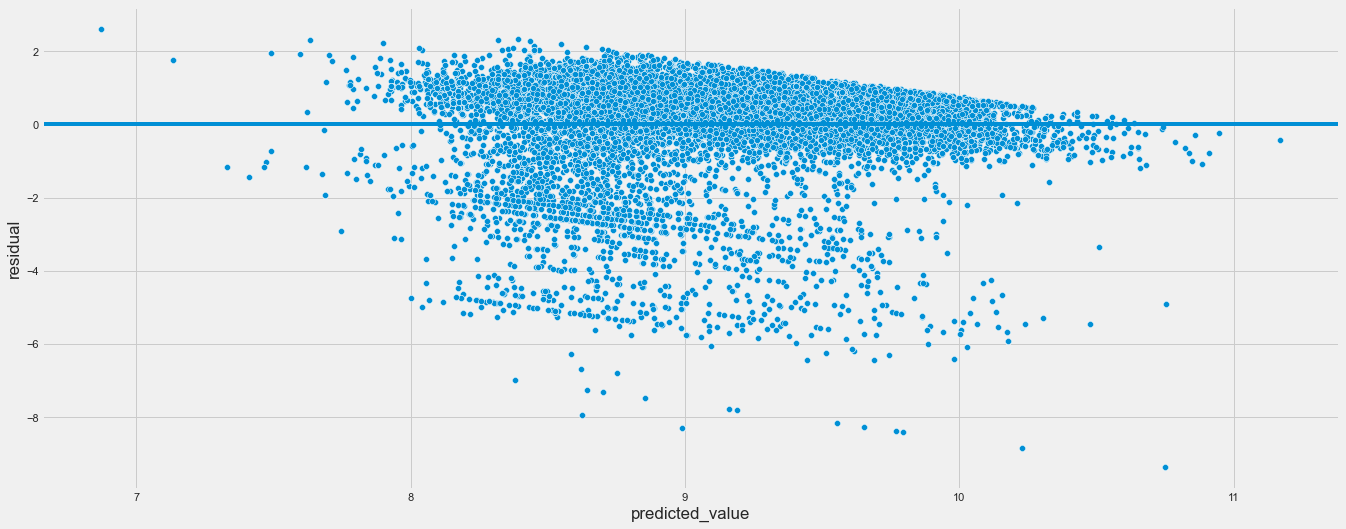

In [126]:
# calculate residuals
residual = y_price_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [127]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_price_train)

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_price_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_price_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_price_train)))

RMSE for training data is 1.299402750279707
MAE for training data is 0.8568697361515495
MAPE for training data is 0.0954173603015266


### Testing Error

In [129]:
# prepare prediction result on test data
X_price_test = feature_price_test.to_numpy()
y_predict_test = lasso_best.predict(X_price_test)

# ground truth target

y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_price_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_price_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_price_test)))

RMSE for testing data is 1.2883129392736523
MAE for testing data is 0.8518886101699081
MAPE for testing data is 0.09489189173418469


interpretation :

model Ridge Regression nya cendrung acceptable, karena RMSE dari training data mirip-mirip dengan test data, Mape di training dan test data tidak lebih dari 30 % maka tidak underfit, namun r2 minus, model ridge regression tidak dapat digunakan.

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

r2_train_la_r = r2_score(y_predict_train, y_price_train)
r2_test_la_r = r2_score(y_predict_test, y_price_test)

rmsle_train_la_r = np.sqrt(mean_squared_log_error(y_predict_train, y_price_train))
rmsle_test_la_r = np.sqrt(mean_squared_log_error(y_predict_test, y_price_test))

rmse_train_la_r = np.sqrt(mean_squared_error(y_predict_train, y_price_train))
rmse_test_la_r = np.sqrt(mean_squared_error(y_predict_test, y_price_test))

mae_train_la_r = mean_absolute_error(y_predict_train, y_price_train) 
mae_test_la_r = mean_absolute_error(y_predict_test, y_price_test)

mape_train_la_r = mean_absolute_percentage_error(y_predict_train, y_price_train)
mape_test_la_r = mean_absolute_percentage_error(y_predict_test, y_price_test)


In [132]:
#Storing results in a data frame
result2 = pd.DataFrame({'Algorithm used':['Lasso Regression'],
                        'R2score of train data':[r2_train_la_r],
                       'R2score of test data':[r2_test_la_r],
                        'RMSLE of train data':[rmsle_train_la_r],
                       'RMSLE of test data':[rmsle_test_la_r],
                        'RMSE of train data':[rmse_train_la_r],
                        'RMSE of test data':[rmse_test_la_r],
                        'MAE of train data':[mae_train_la_r],
                        'MAE of test data':[mae_test_la_r],
                        'MAPE of train data':[mape_train_la_r],
                        'MAPE of test data':[mape_test_la_r]
                        })
result2

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data,RMSE of train data,RMSE of test data,MAE of train data,MAE of test data,MAPE of train data,MAPE of test data
0,Lasso Regression,-5.068738,-4.927723,0.164311,0.162407,1.299403,1.288313,0.85687,0.851889,0.095417,0.094892


# Decision Tree regressor

Note: Feature scaling is not required for Decision trees, Random forests, Boosting algorithms. Becuase these won't use distance measurement techniques i.e, Euclidean distance, Manhattan distance, etc., unlike Linear regression, Logistc regression, KNN, KMeans,etc.,

In [133]:
from sklearn.model_selection import train_test_split
#Performing Train-test split on original data frame
X = databaseline.drop('Price',axis=1)
y = databaseline['Price']

#Split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100,shuffle=True)

After experimenting with multiple hyper parameters in the decision tree regressor, we got a beautiful r2 score and rmsle with the following parameters,

- max_depth = 20
- min_samples_leaf = 5
- criterion = friedman_mse

So, let's build our decision tree regressor setting the above parameters while keeping the remaining parameters default.

In [134]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=20,
                      min_samples_leaf=5,
                          criterion='friedman_mse')
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5)

In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [136]:
#Predictions and evaluation
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(r2_score_train,r2_score_test))
print('********************************************************************************************')
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

R2 score for train set: 0.951120328068723 & R2 score for test set: 0.9464928611674515
********************************************************************************************
RMSLE score for train set: 0.03792854259051053 & RMSLE score for test set: 0.039697927727465436


In [137]:
r2_train_dt = r2_score(y_train, y_pred_train)
r2_test_dt = r2_score(y_test, y_pred_test)

rmsle_train_dt = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test_dt = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train_dt = mean_absolute_error(y_train, y_pred_train) 
mae_test_dt = mean_absolute_error(y_test, y_pred_test)

mape_train_dt = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test_dt = mean_absolute_percentage_error(y_test, y_pred_test)


In [138]:
#Storing results in a data frame
result2 = pd.DataFrame({'Algorithm used':['Decision tree regressor'],
                        'R2score of train data':[r2_train_dt],
                       'R2score of test data':[r2_test_dt],
                        'RMSLE of train data':[rmsle_train_dt],
                       'RMSLE of test data':[rmsle_test_dt],
                        'RMSE of train data':[rmse_train_dt],
                        'RMSE of test data':[rmse_test_dt],
                        'MAE of train data':[mae_train_dt],
                        'MAE of test data':[mae_test_dt],
                        'MAPE of train data':[mape_train_dt],
                        'MAPE of test data':[mape_test_dt]
                        })
result2

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data,RMSE of train data,RMSE of test data,MAE of train data,MAE of test data,MAPE of train data,MAPE of test data
0,Decision tree regressor,0.95112,0.946493,0.037929,0.039698,0.313535,0.328254,0.103234,0.108747,0.013222,0.013897


# Result Evaluate & Conclusion

In [139]:
result3 = pd.DataFrame({'Algorithm used':['Decision tree regressor','Linear Regression','Ridge Regression','Lasso Regression','Random Forest Regressor'],
                        'R2score of train data':[r2_train_dt,r2_train_lr,r2_train_rr,r2_train_la_r,r2_train_rfr],
                       'R2score of test data':[r2_test_dt,r2_test_lr,r2_test_rr,r2_test_la_r,r2_test_rfr],
                        'RMSLE of train data':[rmsle_train_dt,rmsle_train_lr,rmsle_train_rr,rmsle_train_la_r,rmsle_train_rfr],
                       'RMSLE of test data':[rmsle_test_dt,rmsle_test_lr,rmsle_test_rr,rmsle_test_la_r,rmsle_test_rfr],
                        'RMSE of train data':[rmse_train_dt,rmse_train_lr,rmse_train_rr,rmse_train_la_r,rmse_train_rfr],
                        'RMSE of test data':[rmse_test_dt,rmse_test_lr,rmse_test_rr,rmse_test_la_r,rmse_test_rfr],
                        'MAE of train data':[mae_train_dt,mae_train_lr,mae_train_rr,mae_train_la_r,mae_train_rfr],
                        'MAE of test data':[mae_test_dt,mae_test_lr,mae_test_rr,mae_test_la_r,mae_test_rfr],
                        'MAPE of train data':[mape_train_dt,mape_train_lr,mape_train_rr,mape_train_la_r,mape_train_rfr],
                        'MAPE of test data':[mape_test_dt,mape_test_lr,mape_test_rr,mape_test_la_r,mape_test_rfr]
                        })
# result3
sorted_df = result3.sort_values(by=['R2score of test data'], ascending=True)
sorted_df

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data,RMSE of train data,RMSE of test data,MAE of train data,MAE of test data,MAPE of train data,MAPE of test data
3,Lasso Regression,-5.068738,-4.927723,0.164311,0.162407,1.299403,1.288313,0.856870,0.851889,0.095417,0.094892
2,Ridge Regression,-3.490133,-3.398392,0.162686,0.160769,1.285812,1.274325,0.849134,0.842707,0.095126,0.094434
1,Linear Regression,0.181192,0.188720,0.162368,0.161396,1.283254,1.278172,0.846279,0.845698,0.124897,0.124423
0,Decision tree regressor,0.951120,0.946493,0.037929,0.039698,0.313535,0.328254,0.103234,0.108747,0.013222,0.013897
4,Random Forest Regressor,0.962784,0.959519,0.036131,0.037585,0.273812,0.284638,0.116450,0.123998,0.015959,0.017115


model Linier Regression dan Ridge Regression menghasilkan R2 Score yg buruk, model ini tidak dapat diterapkan, sehingga model terbaik adalah Random Forest Regressor dan Decision Tree Regressor

# saving Machine Learning Model to use on data who don't have target variabel

Menggunakan Decision tree regressor, skor baik pada train dan test. Pertama, akan menyimpan model ini sehingga dapat digunakan untuk membuat prediksi pada kasus penggunaan serupa tanpa pelatihan dari awal

In [143]:
#Saving the Decision tree model
import joblib
joblib.dump(dt,'dtreemodel.pkl')

['dtreemodel.pkl']

In [144]:
joblib.dump(rfr,'rfrmodel.pkl')

['rfrmodel.pkl']

# Making Predictions on the Test data

In [145]:
df2 = pd.read_csv('C:/Users/irvan/Downloads/test.csv')
print('\n Kita dapat mengamati bahwa data memiliki',df2.shape[0],'baris dan memiliki', df2.shape[1],'kolom \n')
df2.head(5)


 Kita dapat mengamati bahwa data memiliki 8245 baris dan memiliki 18 kolom 



,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [146]:
# #reading the test data
# df2 = pd.read_csv('/content/drive/MyDrive/Portfolio Data Science Irvan Sikajudin/project 4/test.csv')
# print('\n Kita dapat mengamati bahwa data memiliki',df2.shape[0],'baris dan memiliki', df2.shape[1],'kolom \n')
# df2.head(5)

In [147]:
#Considering only the relevant columns
cols

['Levy',
 'Prod. year',
 'Leather interior',
 'Engine volume',
 'Mileage',
 'Wheel',
 'Airbags',
 'Turbo',
 'Category_Cabriolet',
 'Category_Coupe',
 'Category_Goods wagon',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Limousine',
 'Category_Microbus',
 'Category_Minivan',
 'Category_Pickup',
 'Category_Sedan',
 'Category_Universal',
 'Fuel type_CNG',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_Hydrogen',
 'Fuel type_LPG',
 'Fuel type_Petrol',
 'Fuel type_Plug-in Hybrid',
 'Gear box type_Automatic',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_4x4',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Doors_2-3',
 'Doors_4-5',
 'Doors_>5',
 'Color_Beige',
 'Color_Black',
 'Color_Blue',
 'Color_Brown',
 'Color_Carnelian red',
 'Color_Golden',
 'Color_Green',
 'Color_Grey',
 'Color_Orange',
 'Color_Pink',
 'Color_Purple',
 'Color_Red',
 'Color_Silver',
 'Color_Sky blue',
 'Color_White',
 'Color_Yellow']

## Repair/Change Data or Data Type

Akan mengubah data sesuai tipe, pada dataset ini yg akan dirubah ialah

**‘Levy’ column**</br>
After analyzing the ‘Levy’ column we found out that it does contain the missing values but it was given as ‘-‘ in the data and that’s why we were not able to capture the missing values earlier in the data.</br>

Here we will impute ‘-‘ in the ‘Levy’ column with ‘0’ assuming there was no ‘Levy’. We can also impute it with ‘mean’ or ‘median’, but that’s a choice that you have to make.

In [148]:
df2['Levy']=df2['Levy'].replace('-',np.nan)
df2['Levy']=df2['Levy'].astype(float)
levy_mean=0
df2['Levy'].fillna(levy_mean,inplace=True)
df2['Levy']=round(df2['Levy'],2)

**‘Mileage’ column**</br>
‘Mileage’ column here means how many kilometres the car has driven. ‘km’ is written in the column after each reading. We will remove that.

In [149]:
#since milage is in KM only we will remove 'km' from it and make it numerical
df2['Mileage']=df2['Mileage'].apply(lambda x:x.split(' ')[0])
df2['Mileage']=df2['Mileage'].astype('int')

**‘Engine Volume’ column**</br>
In the ‘Engine Volumn’ column along with the Engine Volumn ‘type’ of the engine(Turbo or not Turbo) is also written. We will create a new column that shows the ‘type’ of ‘Engine’.

In [150]:
df2['Turbo']=df2['Engine volume'].apply(lambda x:1 if 'Turbo' in str(x) else 0)
df2['Engine volume']=df2['Engine volume'].apply(lambda x:str(x).replace('Turbo',''))
df2['Engine volume']=df2['Engine volume'].astype(float)

**‘Doors’ Column**

In [151]:
df2['Doors'].unique()

array(['02-Mar', '04-May', '>5'], dtype=object)

‘Doors’ column represents the number of doors in the car. But as we can see it is not clean. Let’s clean

In [152]:
df2['Doors']=df2['Doors'].map({'04-May':'4-5','02-Mar':'2-3','>5':'>5'})


In [153]:
df2['Doors'].value_counts()

4-5    7841
2-3     352
>5       52
Name: Doors, dtype: int64

In the Wheel column, let's replace the "Left wheel" value with "Left-hand drive".

In [154]:
df2['Wheel']=df2['Wheel'].replace('Left wheel','Left-hand drive')
df2['Wheel'].value_counts()

Left-hand drive     7631
Right-hand drive     614
Name: Wheel, dtype: int64

### Missing Values

In [155]:
data = df2

In [156]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


Tidak ada mising value pada dataset, lanjut cek duplikat

### Duplicate Values

In [157]:
dup = data.duplicated().sum()/df.shape[0]*100
print('Persentase data duplicate dari keseluruhan data adalah ',round(dup,2), 'persen, dengan total baris yang duplicate adalah',data.duplicated().sum() )

Persentase data duplicate dari keseluruhan data adalah  0.04 persen, dengan total baris yang duplicate adalah 75


In [158]:
data[data.duplicated()].head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Turbo
1137,45815375,0.0,LEXUS,RX 300,2002,Jeep,Yes,Petrol,3.0,201000,6,Automatic,4x4,4-5,Left-hand drive,Silver,8,NaN,1
1157,45813894,1172.0,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Petrol,3.5,121245,6,Automatic,Rear,4-5,Left-hand drive,Silver,12,NaN,0
1931,45815239,1053.0,MERCEDES-BENZ,GLK 350,2014,Jeep,Yes,Petrol,3.5,156768,6,Automatic,4x4,4-5,Left-hand drive,White,12,NaN,0
2076,45793611,1341.0,FORD,Focus,2006,Hatchback,No,Petrol,1.8,0,4,Manual,Front,4-5,Left-hand drive,Sky blue,8,NaN,0
2197,45815359,1493.0,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981,6,Automatic,Front,4-5,Left-hand drive,Black,12,NaN,0


In [159]:
data.shape

(8245, 19)

In [160]:
data = data.drop_duplicates()
data.shape

(8170, 19)

### Drop Fitur

In [161]:
#Since the columns 'ID','Manufacturer' and 'Model' are not suitable for our analysis, let's drop them.
df2.drop(['ID','Manufacturer','Model','Cylinders'],axis=1,inplace=True)
df2.head(2)

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Turbo
0,0.0,2012,Hatchback,No,Diesel,2.0,0,Manual,Front,2-3,Left-hand drive,Grey,10,NaN,1
1,0.0,2012,Sedan,Yes,Petrol,2.4,26000,Tiptronic,Front,4-5,Left-hand drive,Grey,10,NaN,0


In [162]:
#Since the columns 'ID','Manufacturer' and 'Model' are not suitable for our analysis, let's drop them.
df2.drop(['Price'],axis=1,inplace=True)
df2.head(2)

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,0.0,2012,Hatchback,No,Diesel,2.0,0,Manual,Front,2-3,Left-hand drive,Grey,10,1
1,0.0,2012,Sedan,Yes,Petrol,2.4,26000,Tiptronic,Front,4-5,Left-hand drive,Grey,10,0


### Data Preprocessing - Encoding

#### Label Encoding

In [163]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [164]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Leather interior'.
df2['Leather interior']= label_encoder.fit_transform(df2['Leather interior'])
df2['Wheel']= label_encoder.fit_transform(df2['Wheel'])

In [165]:
df2.head(2)

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,0.0,2012,Hatchback,0,Diesel,2.0,0,Manual,Front,2-3,0,Grey,10,1
1,0.0,2012,Sedan,1,Petrol,2.4,26000,Tiptronic,Front,4-5,0,Grey,10,0


#### One Hot Encoding

In [166]:
# lihat sekilas hasil One hot encode column ['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color'] dan definisikan ke one_hot_columns
one_hot_columns = pd.get_dummies(df2[['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color']])

#kode singkat dari kode di atas
# one_hot_columns = pd.get_dummies(object_columns)

In [167]:
# kolom kolom yang berada dalam one_hot_columns   ingin di one hot encoding
dumies_one_hot_encod = one_hot_columns 

# bagian one hot encoding dari kolom Contract dan PaymenMethod
df2 = pd.concat([df2, dumies_one_hot_encod], axis = 1)

# # hapus kolom yang berada di dalam one_hot_columns  dari dataframe awal
df2.drop(['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color'], axis = 1, inplace = True)

df2.head()

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Category_Cabriolet,Category_Coupe,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0.0,2012,0,2.0,0,0,10,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,2012,1,2.4,26000,0,10,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,2005,0,1.5,168000,1,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,975.0,2012,1,3.2,143000,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1993,0,1.6,200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
print('\nKita dapat mengamati bahwa data memiliki',df2.shape[0],'baris dan memiliki', df2.select_dtypes(include=numerics).shape[1],'kolom numerik')
print('kolom numerik pada data ==> ', list(df2.select_dtypes(include=numerics).columns),' \n')
df2_num = df2.select_dtypes(include=numerics)

print('\nKita dapat mengamati bahwa data memiliki',df2.shape[0],'baris dan memiliki', df2.select_dtypes(include=object).shape[1],'kolom kateogorik')
print('kolom Kategorik yg masih dalam bentuk String pada data ==> ', list(df2.select_dtypes(include=object).columns),' \n')
df2_cat = df2.select_dtypes(include=object)

rows = []
for col in df2 :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df2[col].unique()),
            'Data Type': df2[col].dtypes,
            'Unique Values':  df2[col].unique()
        }
  )
pd.options.display.max_colwidth = 170 #maksimal tampil 170 karakter
# pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
print('\nInformasi Kolom Kategori : \n') 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)



Kita dapat mengamati bahwa data memiliki 8245 baris dan memiliki 52 kolom numerik
kolom numerik pada data ==>  ['Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Wheel', 'Airbags', 'Turbo', 'Category_Cabriolet', 'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Automatic', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4', 'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_2-3', 'Doors_4-5', 'Doors_>5', 'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Sky b

,Nama Kolom,Jumlah Unique Values,Data Type,Unique Values
0,Mileage,3978,int32,"[0, 26000, 168000, 143000, 200000, 59733, 102907, 64496, 300234, 170000, 127515, 20796, 197328, 95000, 51236, 211000, 186000, 173576, 169594, 312118, 65000, 112000, 2..."
1,Levy,434,float64,"[0.0, 975.0, 639.0, 1646.0, 1172.0, 891.0, 645.0, 609.0, 663.0, 765.0, 585.0, 696.0, 531.0, 530.0, 777.0, 586.0, 1053.0, 1190.0, 781.0, 707.0, 490.0, 919.0, 1266.0, 1..."
2,Engine volume,61,float64,"[2.0, 2.4, 1.5, 3.2, 1.6, 4.6, 3.5, 1.8, 2.5, 1.7, 2.2, 2.3, 4.0, 1.3, 3.0, 1.4, 3.3, 2.9, 4.8, 3.6, 2.7, 1.0, 0.7, 5.5, 4.4, 4.7, 5.0, 1.2, 2.8, 3.8, 2.6, 5.3, 3.7, ..."
3,Prod. year,45,int64,"[2012, 2005, 1993, 2014, 2015, 2011, 2016, 2018, 2013, 1999, 2001, 2008, 2004, 1997, 2010, 2017, 2019, 1998, 1987, 2003, 1992, 2007, 2009, 2000, 2020, 2006, 2002, 199..."
4,Airbags,17,int64,"[10, 8, 12, 0, 4, 6, 2, 1, 5, 11, 16, 7, 9, 3, 15, 13, 14]"
5,Color_Brown,2,uint8,"[0, 1]"
6,Drive wheels_4x4,2,uint8,"[0, 1]"
7,Drive wheels_Front,2,uint8,"[1, 0]"
8,Drive wheels_Rear,2,uint8,"[0, 1]"
9,Doors_2-3,2,uint8,"[1, 0]"


# Let's make predictions using the 'dt' - Decision tree regressor on the above dataframe and store the results in 'Price' column

In [169]:
#Let's make predictions using the 'dt' - Decision tree regressor on the above dataframe and store the results in 'Price' column
df2['Price'] = dt.predict(df2)
df2['Price']

0       10.078910
1        4.262680
2        8.839277
3        6.936681
4        8.773743
          ...    
8240     9.006387
8241    10.653369
8242     9.887310
8243    10.577585
8244     5.241747
Name: Price, Length: 8245, dtype: float64

In [170]:
#Applying anti-log to transform into the normal values
df2['Price'] = np.exp(df2['Price'])-1
df2['Price']

0       23834.000000
1          70.000000
2        6899.000000
3        1028.348310
4        6461.318818
            ...     
8240     8154.000000
8241    42334.000000
8242    19678.049971
8243    39244.204833
8244      188.000000
Name: Price, Length: 8245, dtype: float64

In [171]:
#Storing the Price column as a separate dataframe
submission = pd.DataFrame(df2['Price'])
submission

,Price
0,23834.000000
1,70.000000
2,6899.000000
3,1028.348310
4,6461.318818
...,...
8240,8154.000000
8241,42334.000000
8242,19678.049971
8243,39244.204833


In [174]:
#Saving as .csv & .xls file
submission.to_csv('C:/Users/irvan/Downloads/Prediction Result with Dicision Tree Regressor.csv', index=False)
submission.to_excel('C:/Users/irvan/Downloads/Prediction Result with Dicision Tree Regressor.xlsx', index=False)


In [173]:
df2[['Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage',
       'Wheel', 'Airbags', 'Turbo', 'Price']].head(5)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Price
0,0.0,2012,0,2.0,0,0,10,1,23834.000000
1,0.0,2012,1,2.4,26000,0,10,0,70.000000
2,0.0,2005,0,1.5,168000,1,8,0,6899.000000
3,975.0,2012,1,3.2,143000,0,12,0,1028.348310
4,0.0,1993,0,1.6,200000,0,0,0,6461.318818


data di atas adalah penampakan prediksi Car Price yang di hasilkan oleh model Machine Learning yang telah di gabung.

# Let's make predictions using the 'rfr' - Random Forest regressor on the above dataframe and store the results in 'Price' column

In [183]:
#Let's make predictions using the 'dt' - Decision tree regressor on the above dataframe and store the results in 'Price' column
df2 = df.drop(['Price'], axis=1)
df2['Price'] = rfr.predict(df2)
df2['Price']

0         9.466734
1         9.706581
2         9.033353
3         7.955912
4         9.375889
           ...    
19229     4.282198
19230     6.242034
19233     9.718871
19234    10.091403
19236     6.446886
Name: Price, Length: 206352, dtype: float64

In [184]:
#Applying anti-log to transform into the normal values
df2['Price'] = np.exp(df2['Price'])-1
df2['Price']

0        12921.614822
1        16424.348003
2         8376.902654
3         2851.388551
4        11799.401044
             ...     
19229       71.399406
19230      512.902925
19233    16627.464832
19234    24133.621497
19236      629.734926
Name: Price, Length: 206352, dtype: float64

In [185]:
#Storing the Price column as a separate dataframe
submission = pd.DataFrame(df2['Price'])
submission

,Price
0,12921.614822
1,16424.348003
2,8376.902654
3,2851.388551
4,11799.401044
...,...
19229,71.399406
19230,512.902925
19233,16627.464832
19234,24133.621497


In [186]:
#Saving as .csv & .xls file
submission.to_csv('C:/Users/irvan/Downloads/Prediction Result with Random Forest Regressor.csv', index=False)
submission.to_excel('C:/Users/irvan/Downloads/Prediction Result with Random Forest Regressor.xlsx', index=False)


In [173]:
df2[['Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage',
       'Wheel', 'Airbags', 'Turbo', 'Price']].head(5)

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Price
0,0.0,2012,0,2.0,0,0,10,1,23834.000000
1,0.0,2012,1,2.4,26000,0,10,0,70.000000
2,0.0,2005,0,1.5,168000,1,8,0,6899.000000
3,975.0,2012,1,3.2,143000,0,12,0,1028.348310
4,0.0,1993,0,1.6,200000,0,0,0,6461.318818
